In [64]:
from scipy.special import jv, jn_zeros
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
import pandas as pd
import matplotlib as mpl
from floquet_simulations.flux_functions import *
from pathlib import Path
from matplotlib.colors import LinearSegmentedColormap
from floquet_simulations.plot_functions import PlotParams
from floquet_simulations.hamiltonians import ConvertComplex
PlotParams(fontsize=10)

In [65]:
omega0 = 8
alpha=1; beta=2
data_dir = Path().absolute().parent.parent/"paper_data"/f"Heff_omega={omega0},alpha={alpha},beta={beta},withJ.csv"
df = pd.read_csv(data_dir,
                  index_col=False,
                   converters={"FT-J12": ConvertComplex,
                                  "FT-J23": ConvertComplex,
                                  "FT-J31": ConvertComplex,
                                  # "HE-J12": ConvertComplex,
                                  # "HE-J23": ConvertComplex,
                                  # "HE-J31": ConvertComplex,
                                  # "HE-O1": ConvertComplex,
                                  # "HE-O2": ConvertComplex,
                                  # "HE-O3": ConvertComplex
                   }
                  )
df.loc[671076:,"FT-J12"]=(-1)*df.loc[671076:,"FT-J12"]
df.loc[671076:,"FT-J23"]=(-1)*df.loc[671076:,"FT-J23"]
df.loc[671076:,"FT-J31"]=(-1)*df.loc[671076:,"FT-J31"]



In [66]:
df = df.groupby(by=["A2", "A3", "omega0", "alpha", "beta", "phi3/pi" ]).agg({'FT-J12':"mean", 
                                             'FT-J23':"mean", 
                                             'FT-J31':"mean", 
                                             "FT-LowerT.X":"mean",
				                "FT-LowerT.Y":"mean"
                          }).reset_index()

# df = df[(df.A2 > jn_zeros(0,1)[0]*8)
        # &(df.A2 < jn_zeros(0,2)[1]*8)
        # &(df.A3 < jn_zeros(0,1)[0]*16)
        # ]
J_index=31
df["xi"]= np.angle(df["FT-J23"].to_numpy()*(-1)+df["FT-J12"].to_numpy()*(-1)+df["FT-J31"].to_numpy()*(-1))
df[f"J{J_index}_abs"]= np.abs(df[f"FT-J{J_index}"].to_numpy())

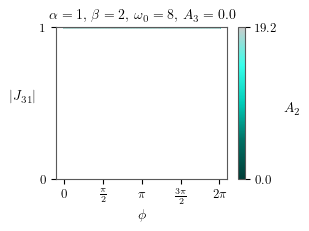

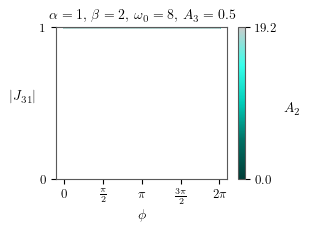

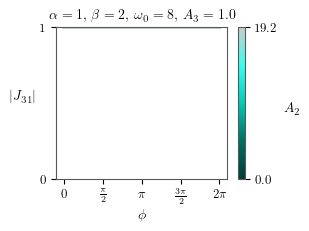

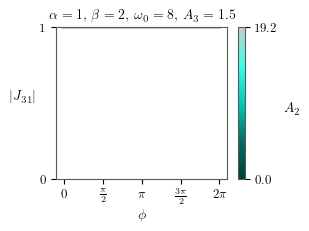

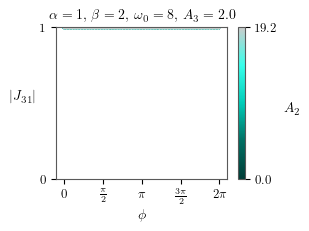

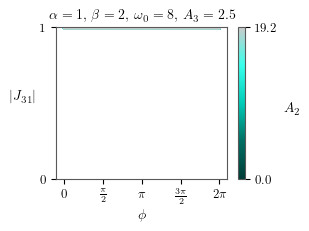

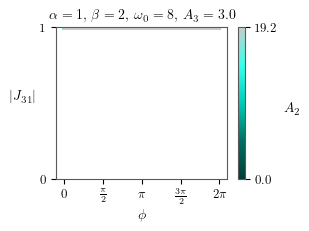

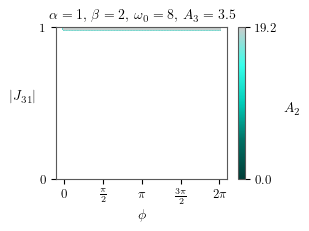

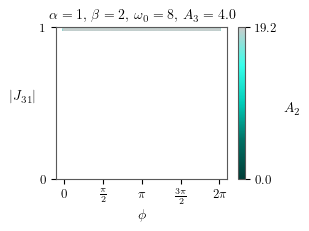

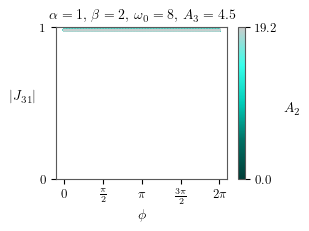

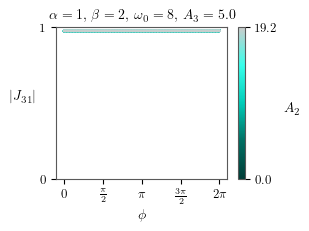

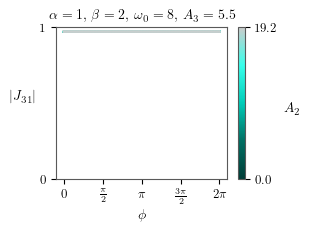

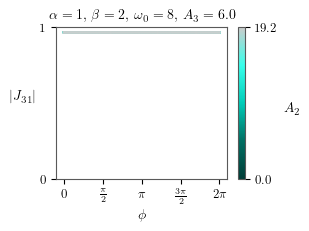

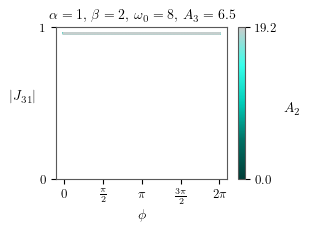

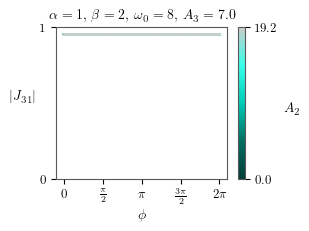

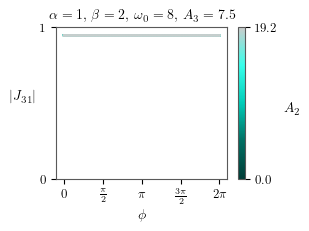

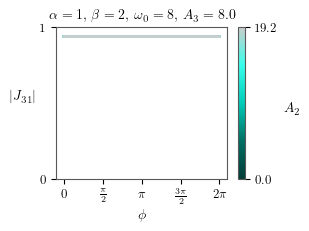

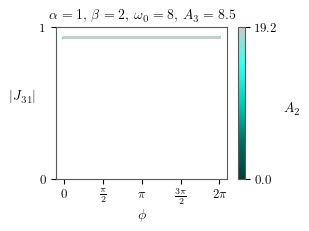

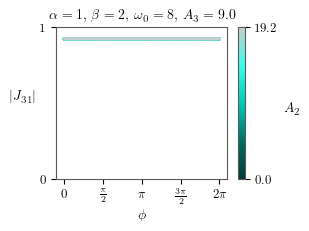

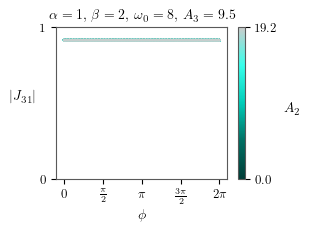

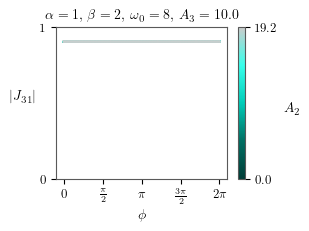

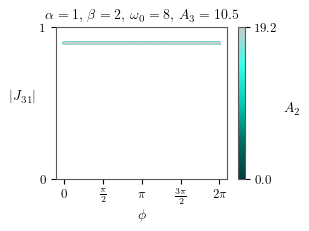

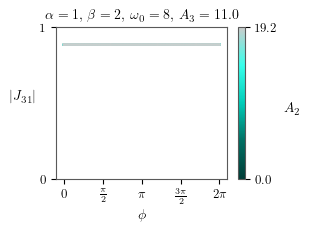

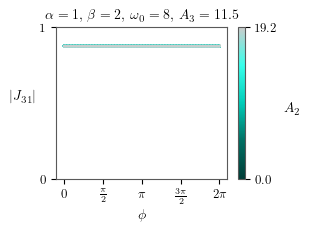

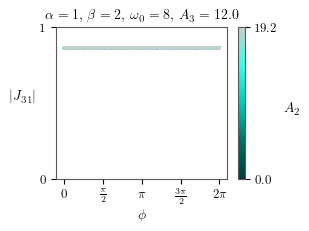

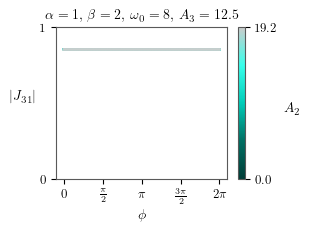

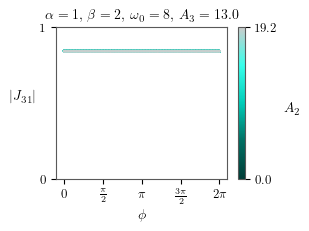

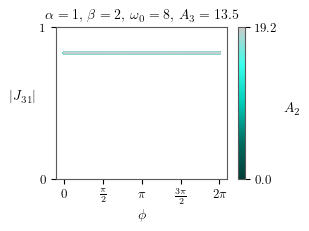

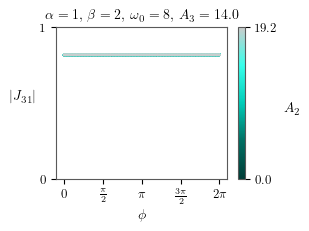

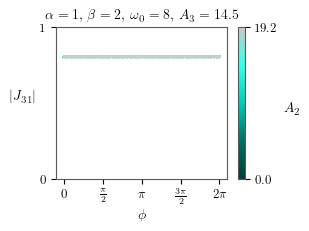

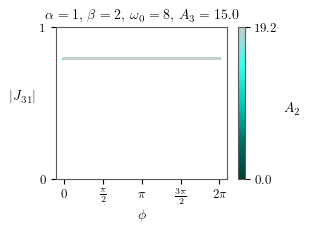

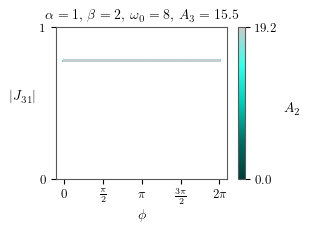

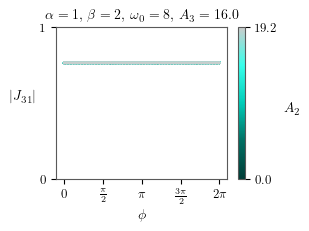

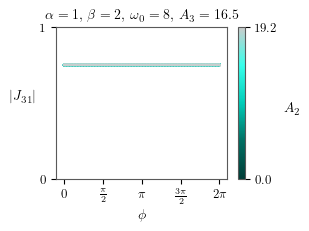

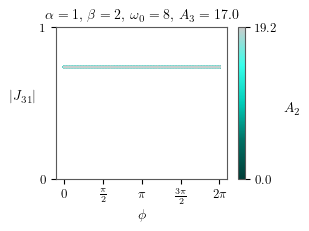

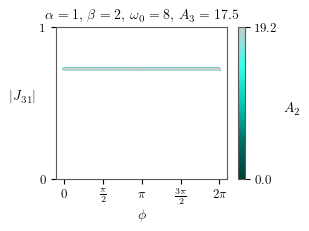

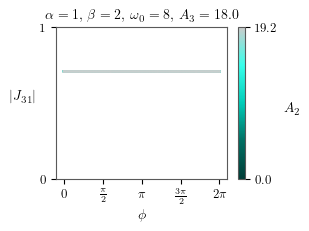

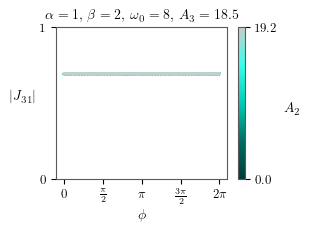

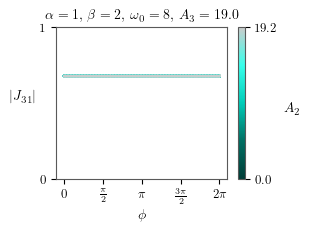

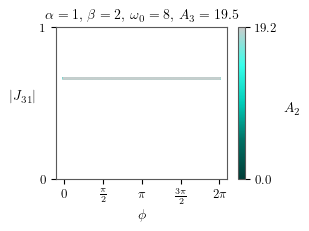

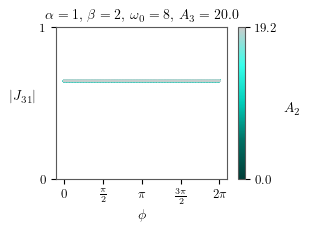

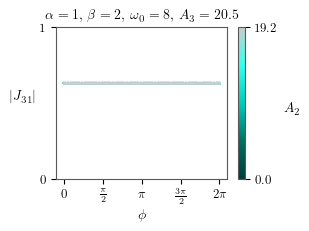

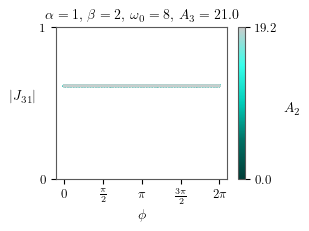

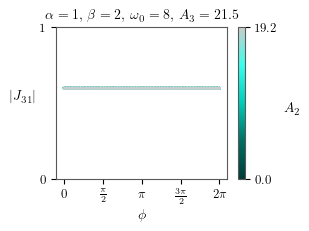

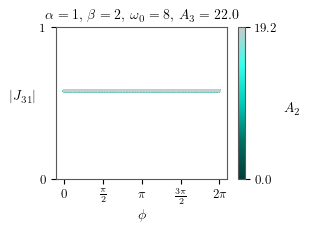

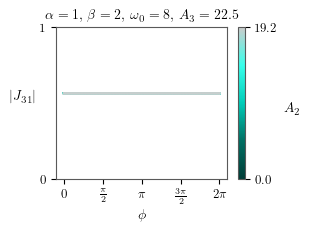

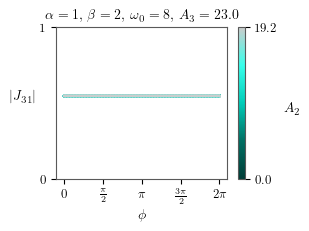

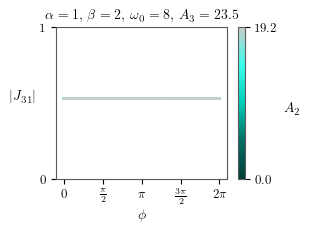

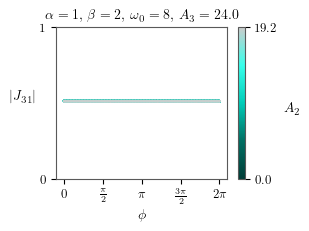

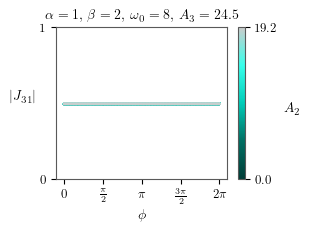

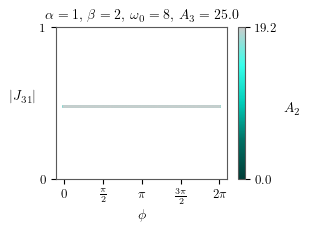

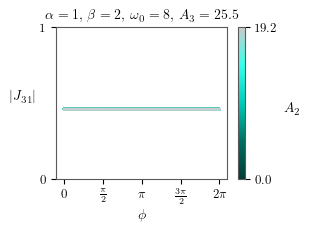

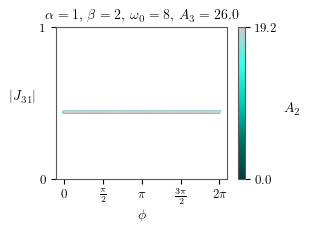

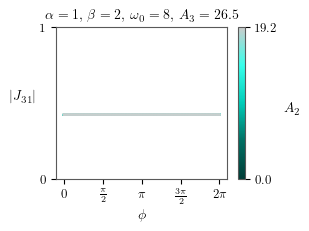

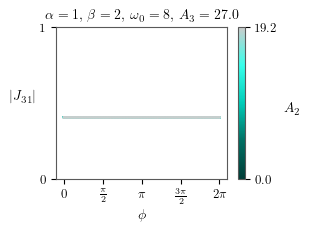

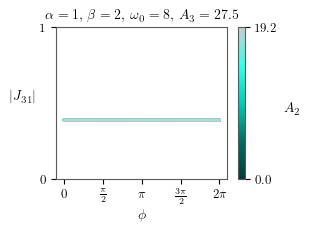

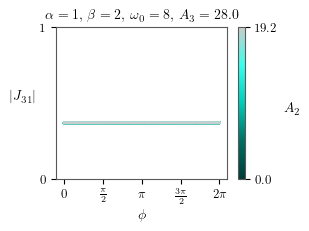

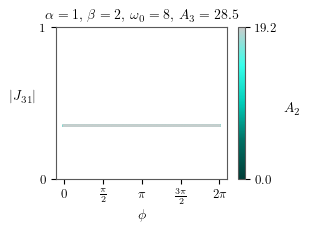

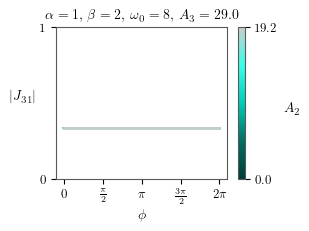

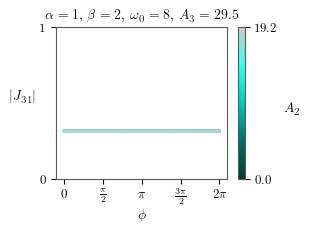

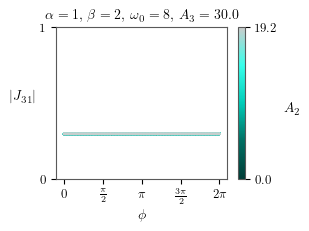

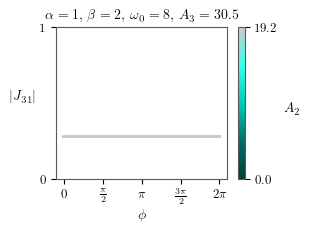

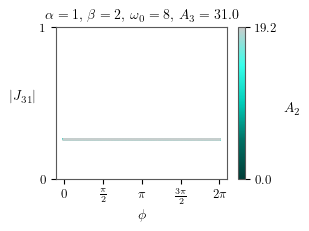

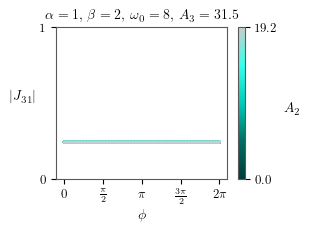

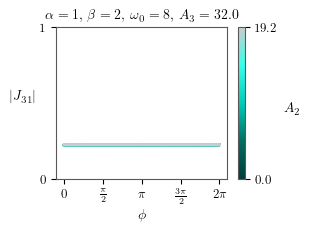

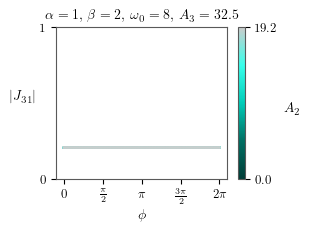

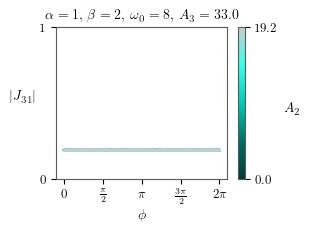

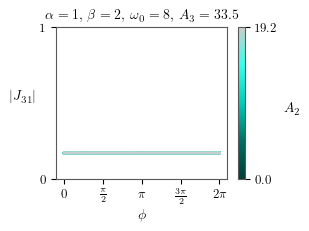

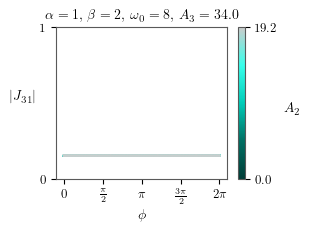

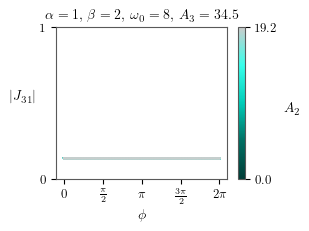

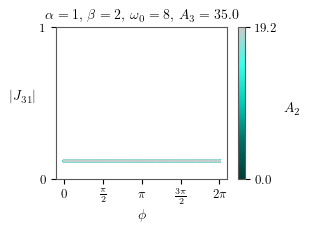

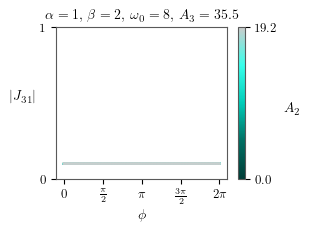

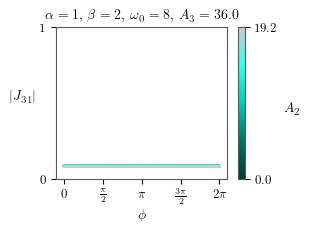

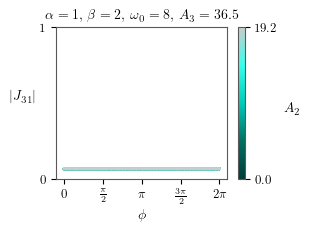

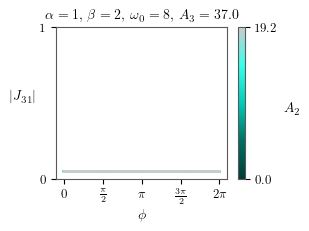

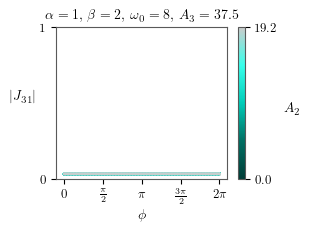

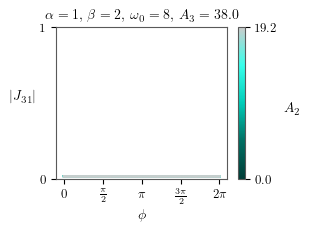

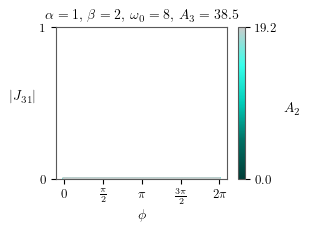

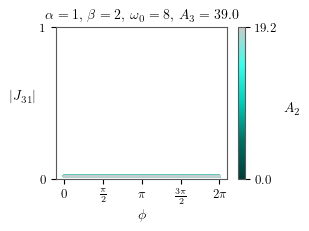

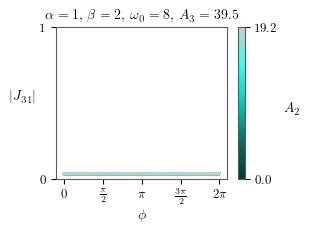

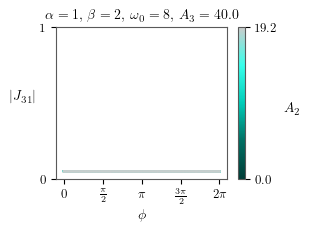

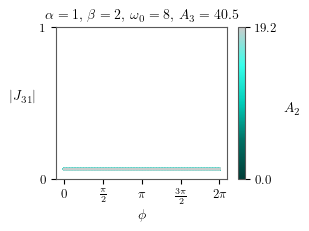

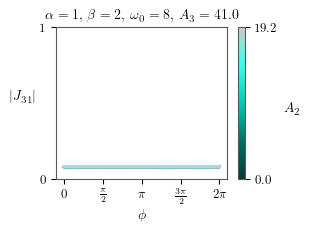

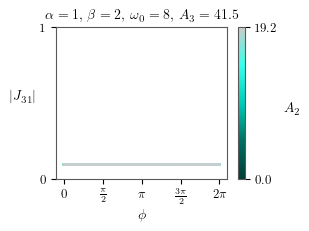

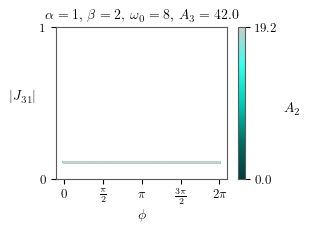

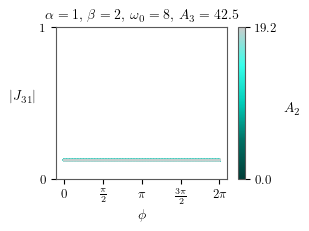

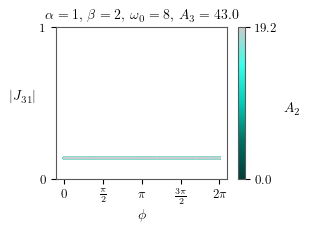

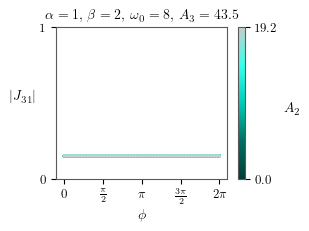

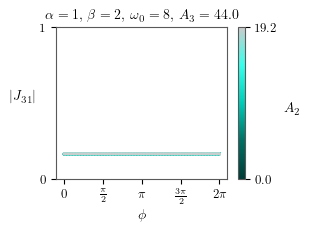

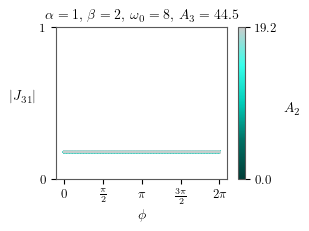

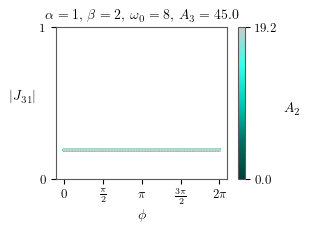

In [67]:
# """
# ABS VAL - keep omega_0 constant (omega0=8)
#     |
#     |
# \xi |
#     |
#     |____________
#           \phi
# - omega_0 constant (omega0=5)
# - compare Ham Evolution and First Term
# - color is A2
# - increase A3 over time
# """

# coloured by A2

dfT = df[(df.A2 < jn_zeros(0,1)[0]*8)
        # &(df.A2 < jn_zeros(0,2)[1]*8)
        # &(df.A3 < jn_zeros(0,1)[0]*16)
        ]



omega0 = 8

phasesFigLoc = Path().absolute().parent.parent/"figures"/"gif_frames"/f"J{J_index}_vs_drive_variables"/"coloured_by_A2"/"first_bessel"
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ["#003D37", '#006F63', "#00CCB8", "#38FFEB",'0.8'], N=256)
norm = mpl.colors.Normalize(vmin=0, vmax=19.2)
cm_unit = 1/2.54
ii = 0
for A3 in np.linspace(0,45,91):
    # if A3 < jn_zeros(0,1)[0]*16: #smaller than like 38
    dfP = dfT[(dfT["omega0"]==omega0)&
                (dfT["A3"]==A3)
                ]
    
    fig, ax = plt.subplots(figsize=(7*cm_unit,5*cm_unit))
    title = r"$\alpha=1$, $\beta=2$, $\omega_0="+str(omega0)+r"$, $A_3="+str(A3)+r"$"

    data = dfP[f"J{J_index}_abs"].to_numpy()
    x = dfP["phi3/pi"].to_numpy()*pi
    colour = dfP.A2.to_numpy()
    # colour = dfP["FT-LowerT.X"]
    sc = ax.scatter(x, data, s=3, c=colour, cmap=cmap, marker=".", norm=norm)

   
    ax.set_xticks([0,pi/2, pi, 3*pi/2, 2*pi])
    ax.set_xticklabels([ '0',r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$",  r"$2\pi$"])
    ax.set_xlabel(r"$\phi$")

    ax.set_ylim([0,1])
    ax.set_yticks([0,1])
    
    ax.set_ylabel(r"$|J_{"+f"{J_index}"+r"}|$", rotation=0, labelpad=12)
    # ax.set_ylim([-0.1,1.1])
    
    cbar = plt.colorbar(sc)
    cbar.ax.set_ylabel(r"$A_2$", rotation=0, labelpad=10)
    cbar.ax.set_yticks([0, 19.2])
    # cbar.ax.set_yticklabels(['0', r'$\pi/2$', r'$\pi$', r"$3\pi/2$", r"$2\pi$"])
    
    ax.set_title(title)
    plt.savefig(phasesFigLoc/f"Frame{ii}.png", format='png', bbox_inches='tight')
    plt.show()
    ii+=1


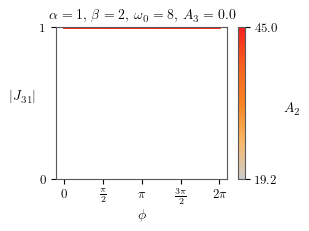

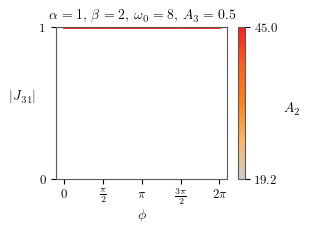

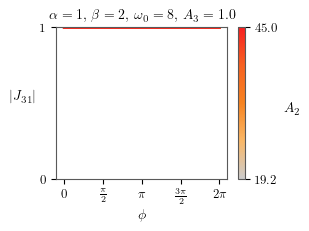

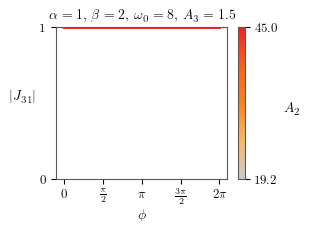

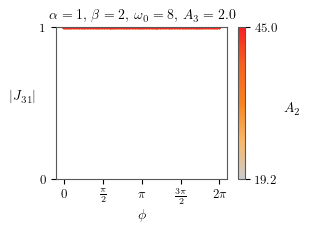

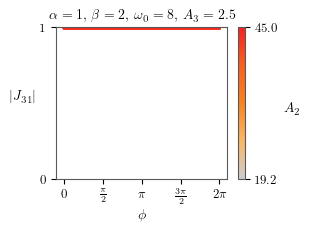

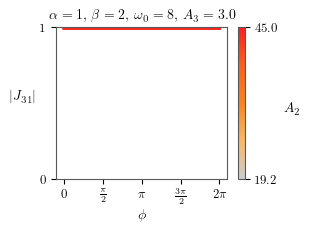

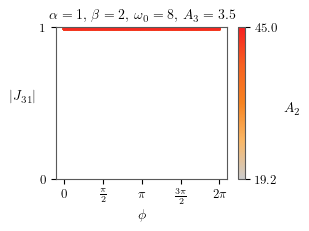

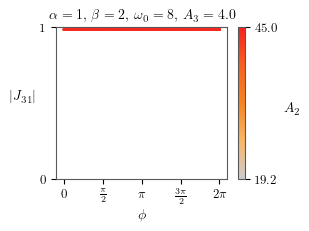

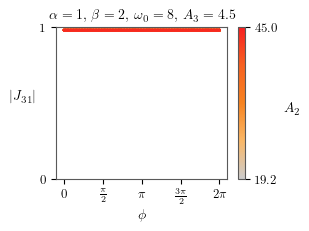

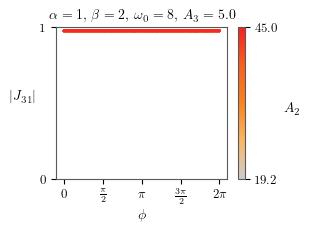

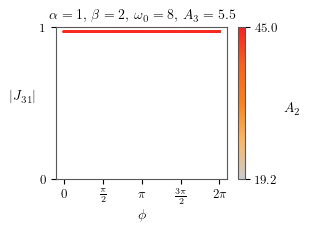

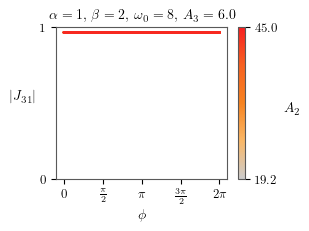

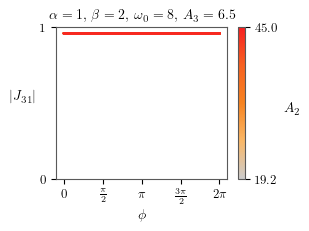

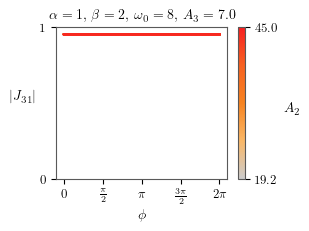

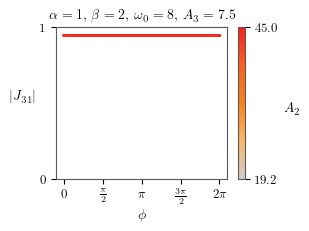

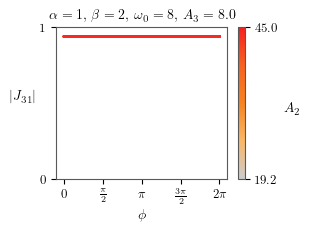

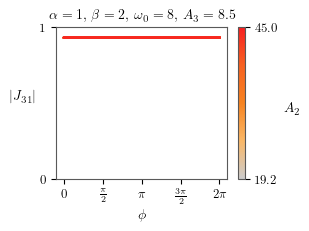

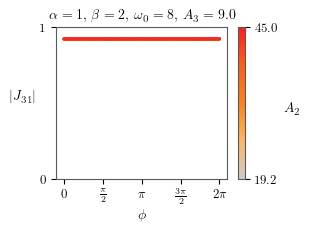

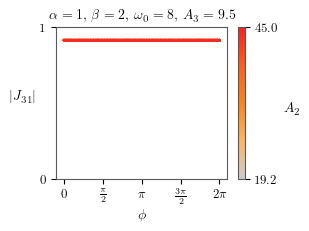

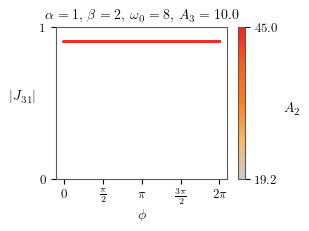

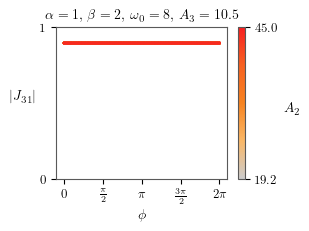

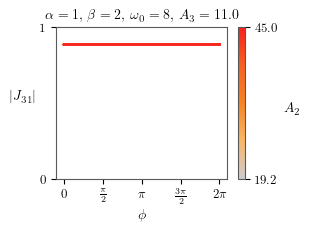

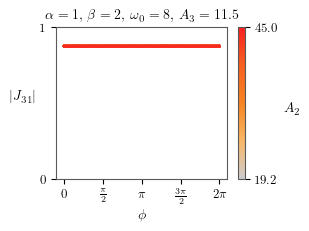

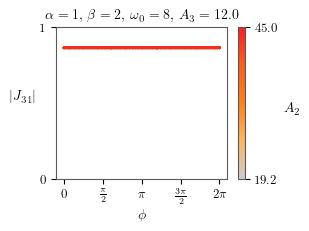

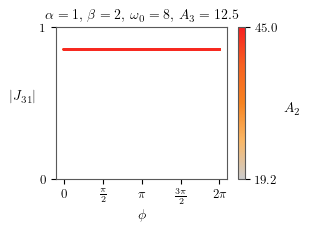

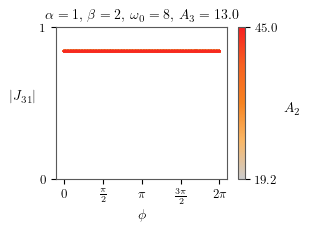

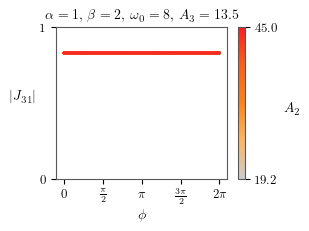

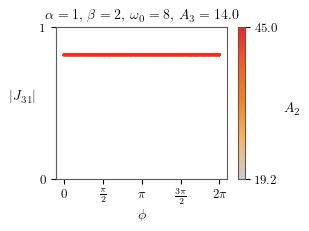

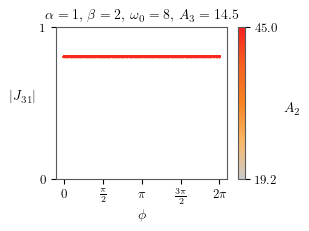

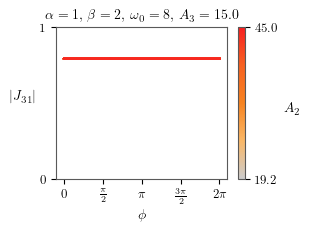

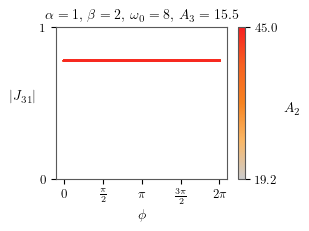

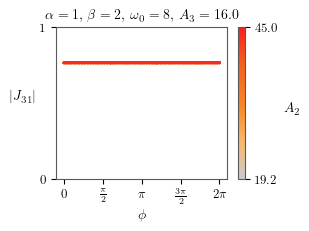

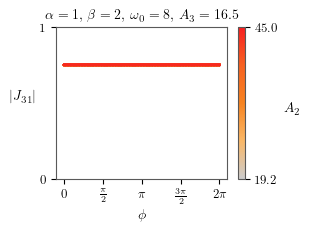

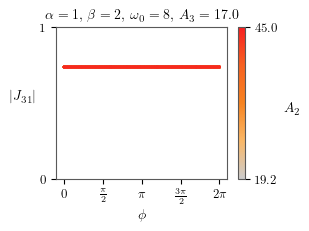

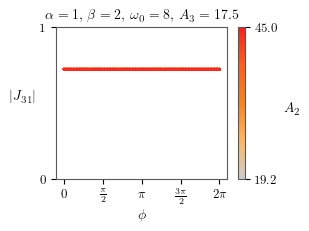

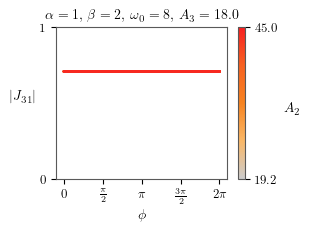

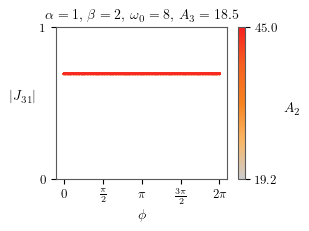

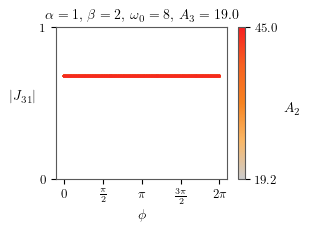

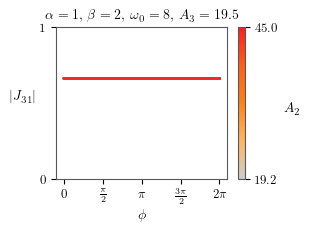

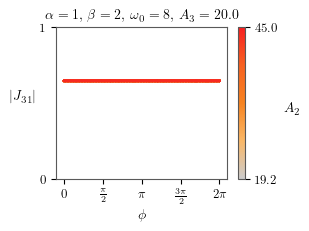

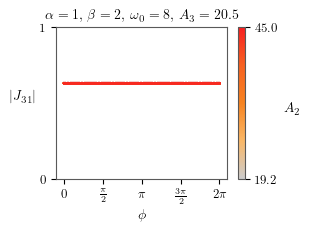

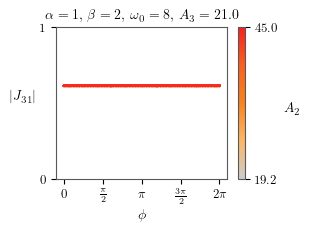

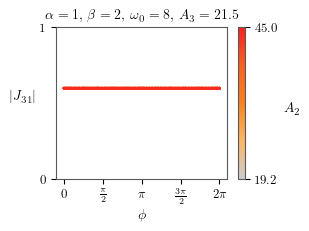

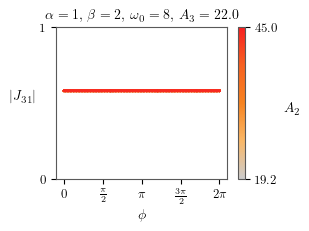

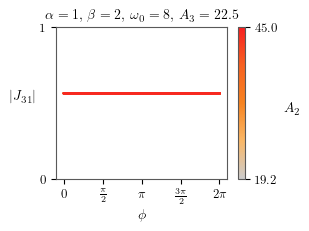

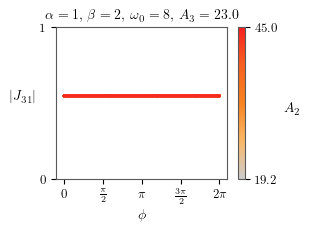

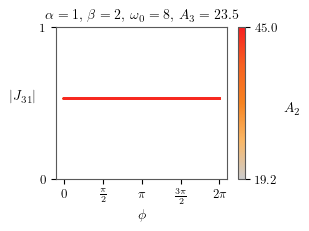

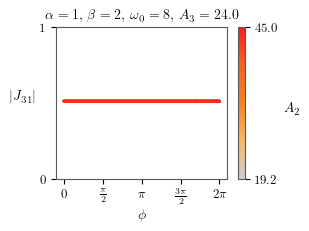

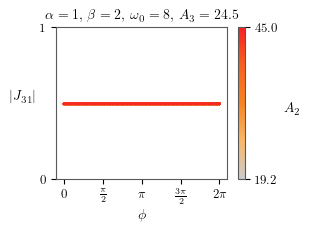

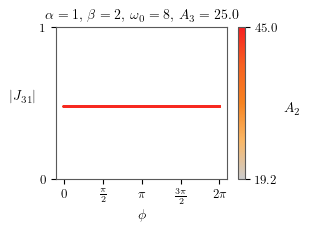

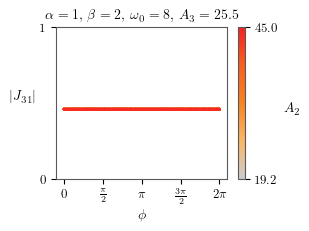

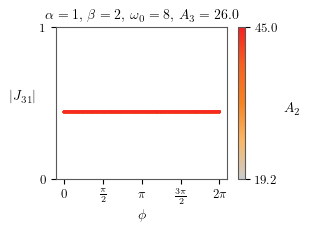

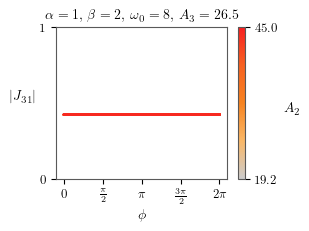

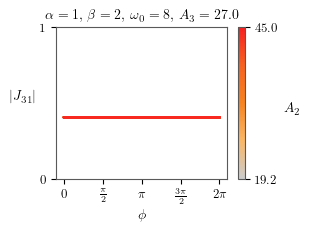

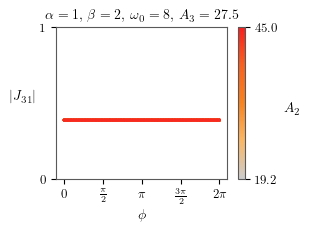

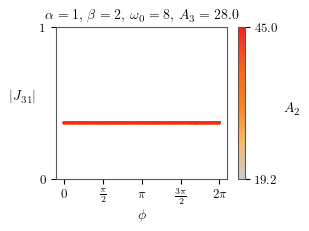

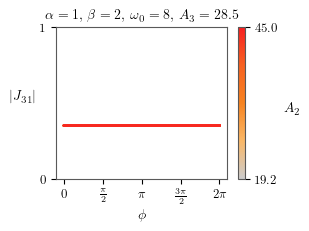

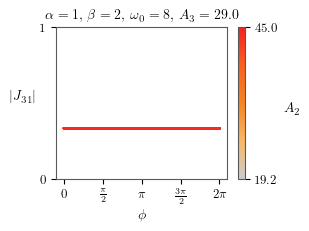

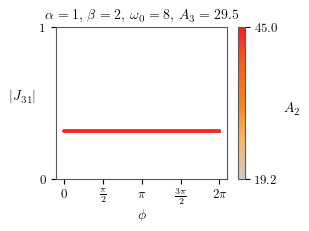

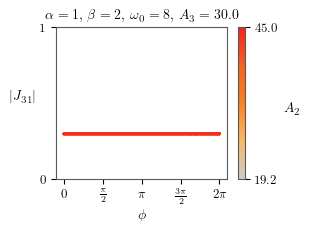

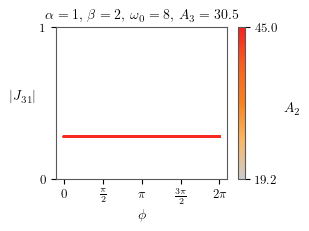

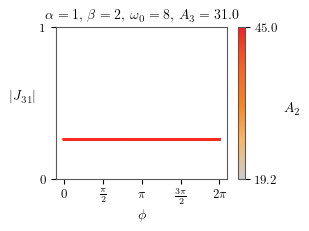

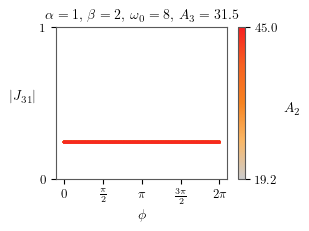

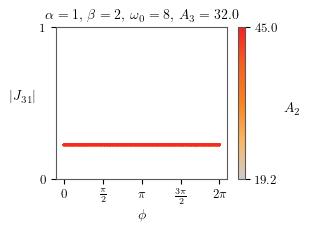

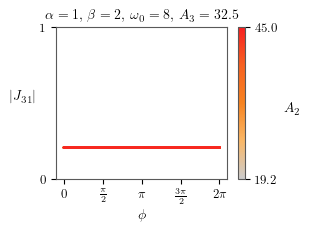

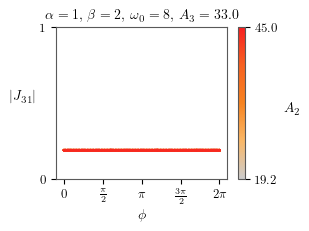

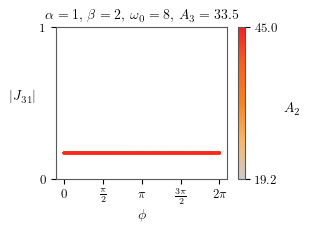

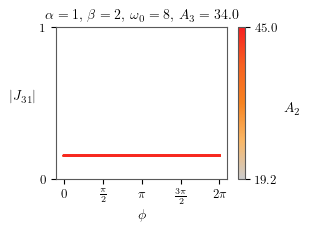

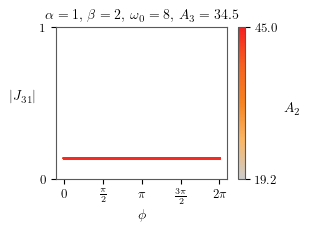

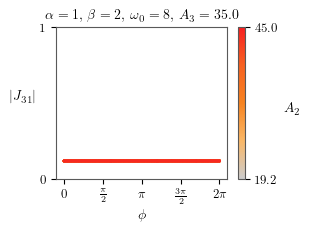

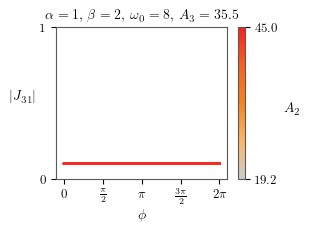

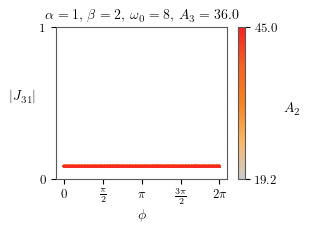

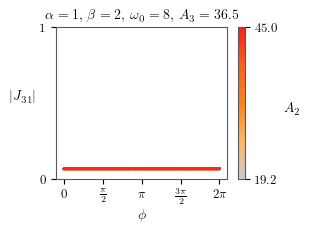

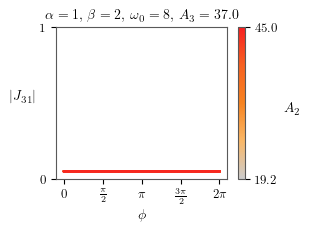

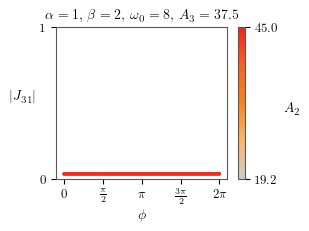

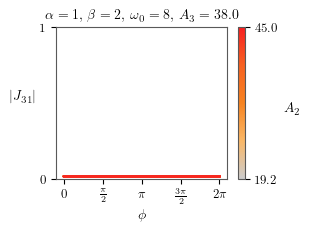

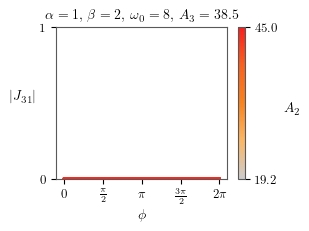

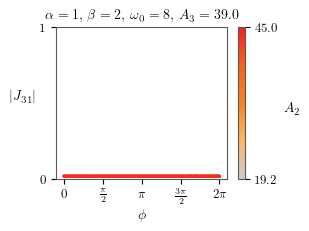

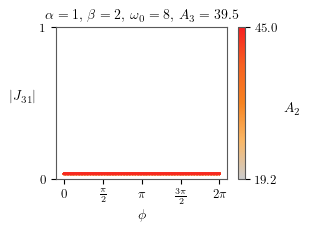

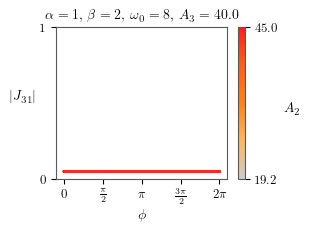

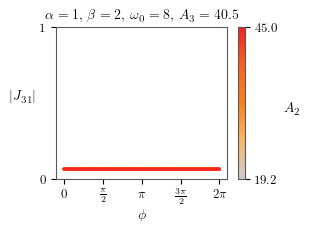

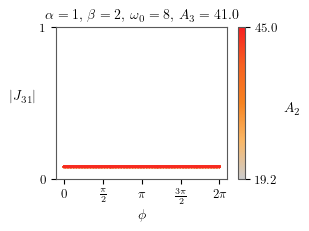

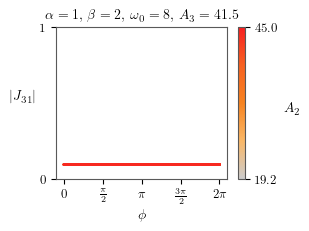

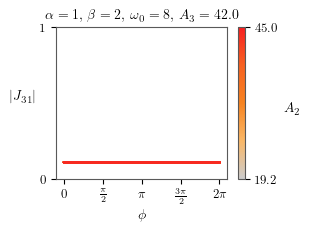

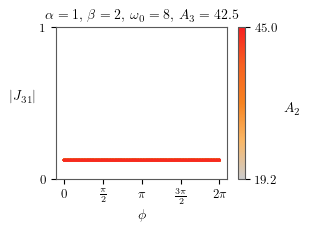

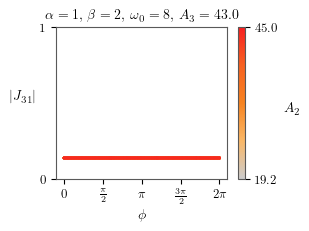

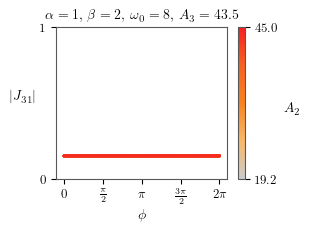

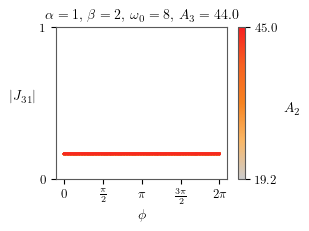

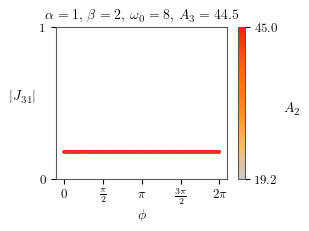

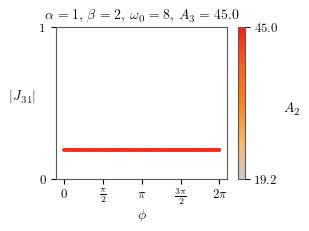

In [68]:
# """
# ABS VAL - keep omega_0 constant (omega0=8)
#     |
#     |
# \xi |
#     |
#     |____________
#           \phi
# - omega_0 constant (omega0=5)
# - compare Ham Evolution and First Term
# - color is A2
# - increase A3 over time
# """

# coloured by A2

dfT = df[(df.A2 > jn_zeros(0,1)[0]*8)
        &(df.A2 < jn_zeros(0,2)[1]*8)
        # &(df.A3 < jn_zeros(0,1)[0]*16)
        ]


omega0 = 8

phasesFigLoc = Path().absolute().parent.parent/"figures"/"gif_frames"/f"J{J_index}_vs_drive_variables"/"coloured_by_A2"/"second_bessel"
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['0.8',"#FAB766", '#F78320', "#F76120", "#F72020"], N=256)#F76120
norm = mpl.colors.Normalize(vmin=19.2, vmax=45)

cm_unit = 1/2.54
ii = 0
for A3 in np.linspace(0,45,91):
    # if A3 < jn_zeros(0,1)[0]*16: #smaller than like 38
    dfP = dfT[(dfT["omega0"]==omega0)&
                (dfT["A3"]==A3)
                ]
    
    fig, ax = plt.subplots(figsize=(7*cm_unit,5*cm_unit))
    title = r"$\alpha=1$, $\beta=2$, $\omega_0="+str(omega0)+r"$, $A_3="+str(A3)+r"$"

    data = dfP[f"J{J_index}_abs"].to_numpy()
    x = dfP["phi3/pi"].to_numpy()*pi
    colour = dfP.A2.to_numpy()
    # colour = dfP["FT-LowerT.X"]
    sc = ax.scatter(x, data, s=3, c=colour, cmap=cmap, marker=".", norm=norm)

   
    ax.set_xticks([0,pi/2, pi, 3*pi/2, 2*pi])
    ax.set_xticklabels([ '0',r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$",  r"$2\pi$"])
    ax.set_xlabel(r"$\phi$")

    ax.set_ylim([0,1])
    ax.set_yticks([0,1])
    
    ax.set_ylabel(r"$|J_{"+f"{J_index}"+r"}|$", rotation=0, labelpad=12)
    # ax.set_ylim([-0.1,1.1])
    
    cbar = plt.colorbar(sc)
    cbar.ax.set_ylabel(r"$A_2$", rotation=0, labelpad=10)
    cbar.ax.set_yticks([19.2, 45])
    # cbar.ax.set_yticklabels(['0', r'$\pi/2$', r'$\pi$', r"$3\pi/2$", r"$2\pi$"])
    
    ax.set_title(title)
    plt.savefig(phasesFigLoc/f"Frame{ii}.png", format='png', bbox_inches='tight')
    plt.show()
    ii+=1


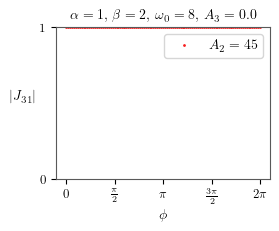

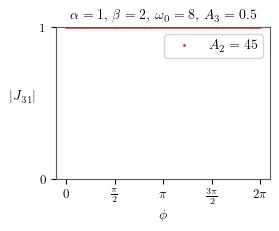

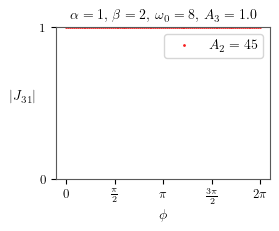

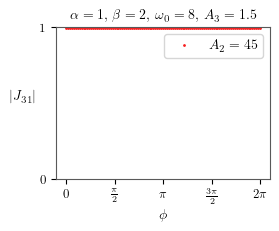

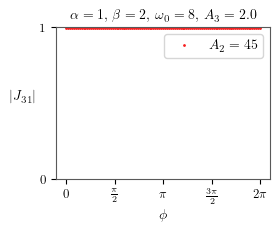

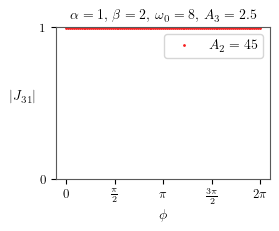

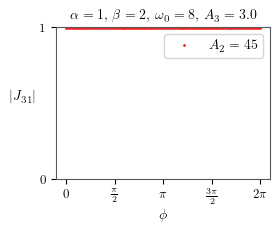

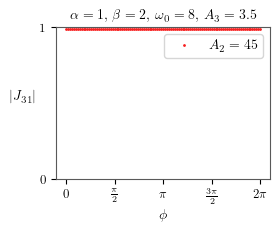

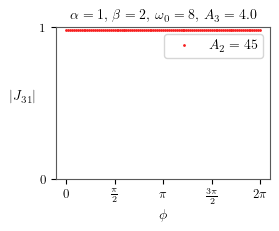

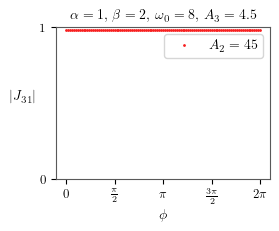

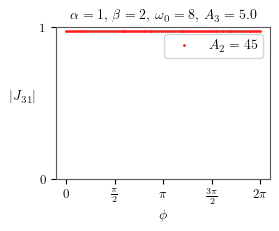

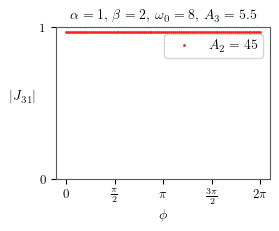

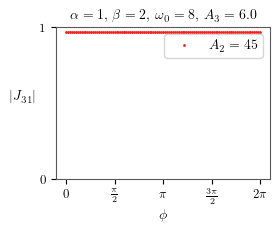

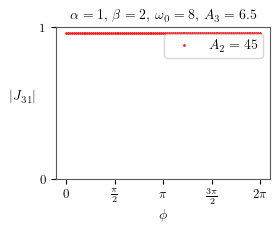

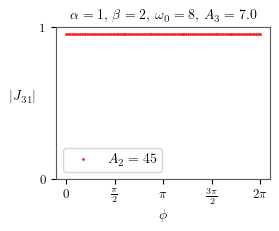

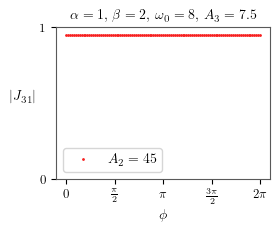

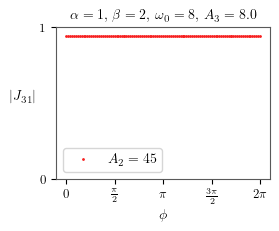

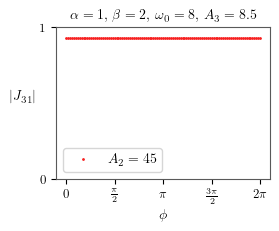

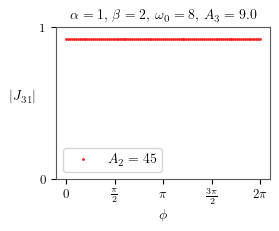

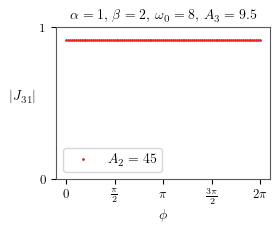

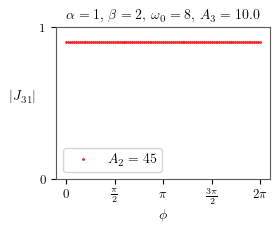

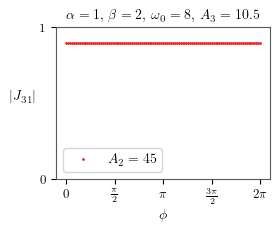

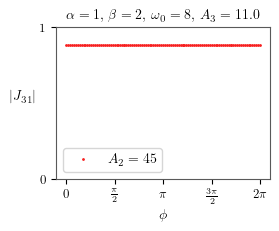

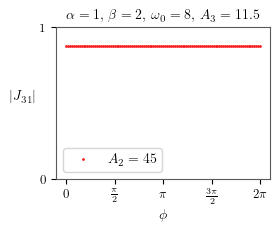

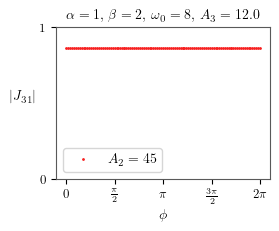

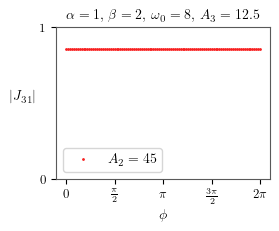

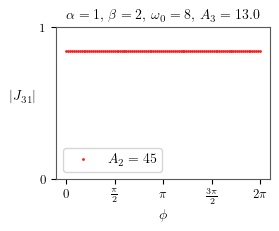

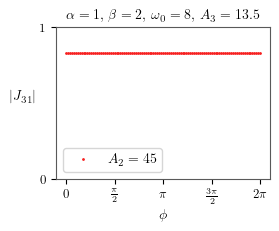

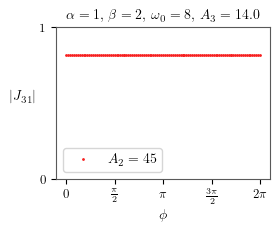

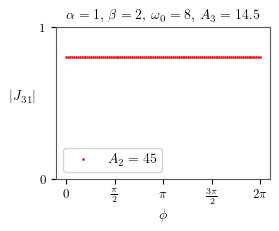

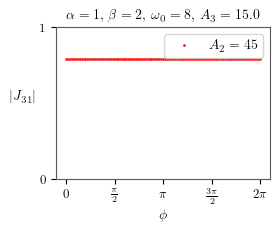

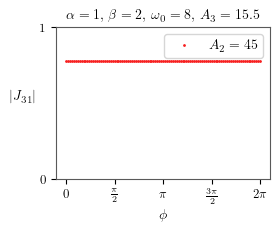

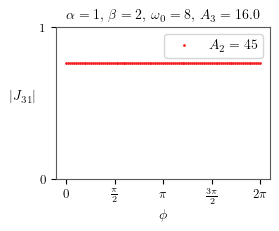

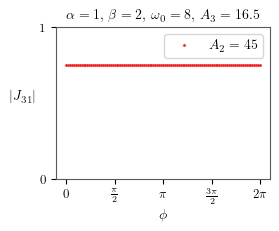

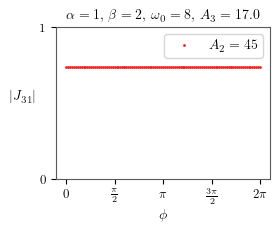

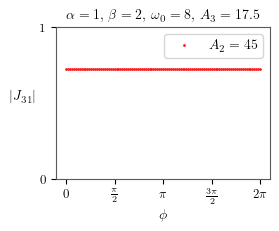

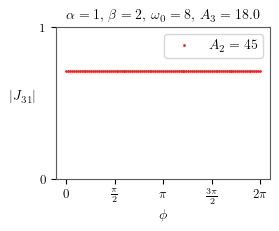

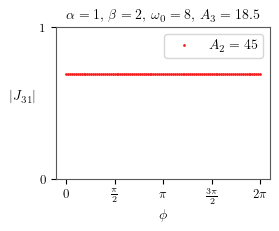

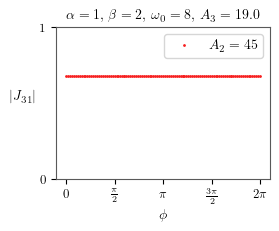

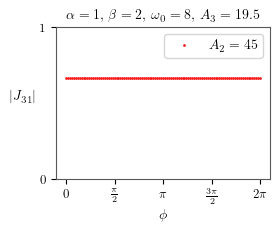

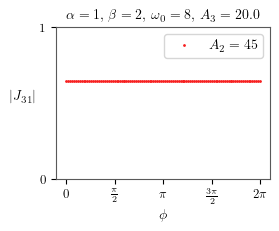

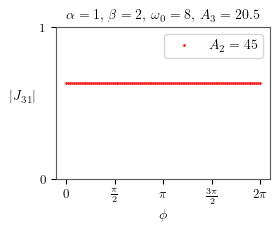

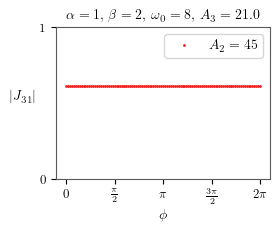

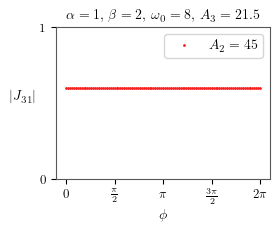

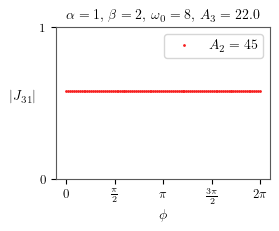

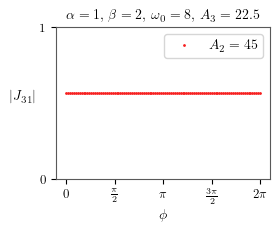

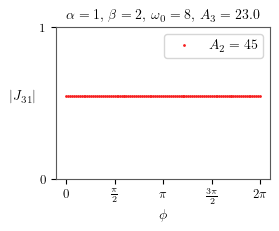

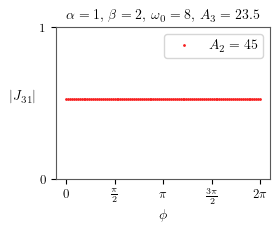

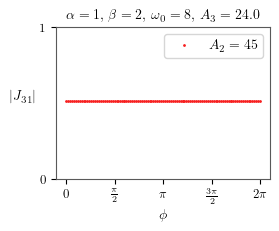

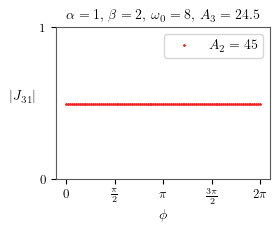

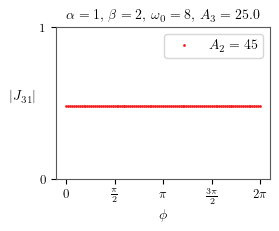

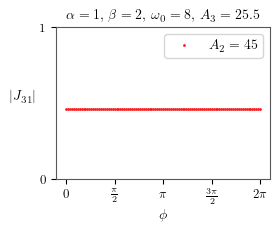

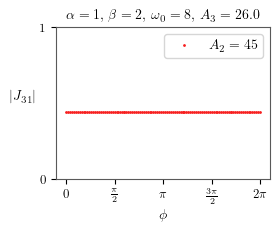

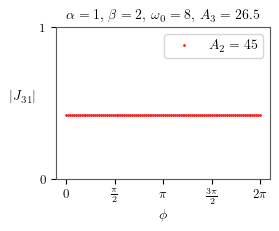

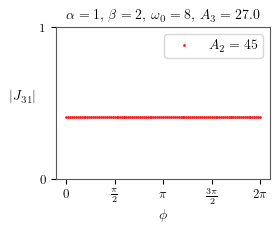

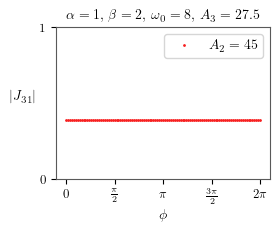

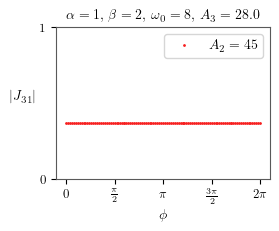

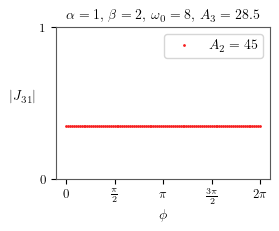

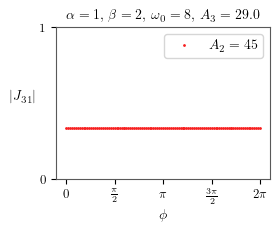

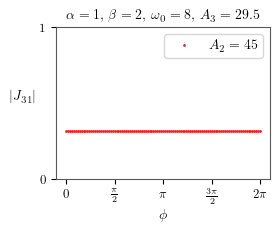

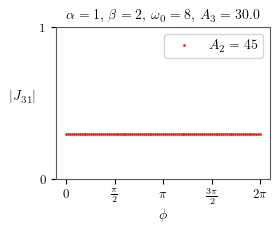

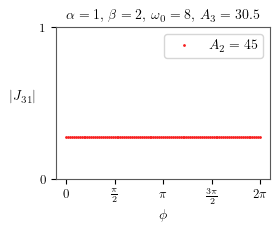

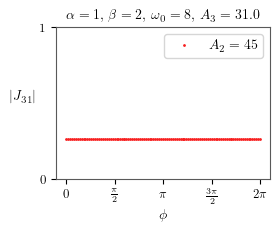

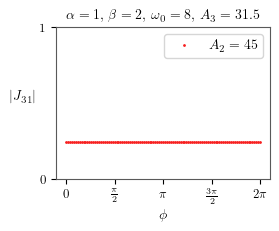

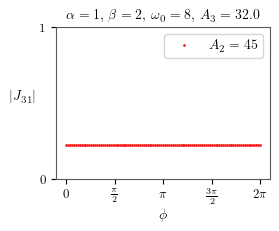

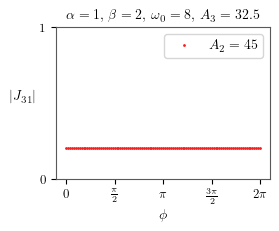

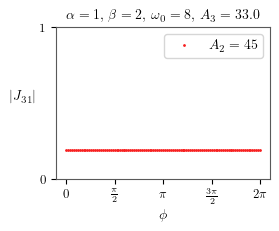

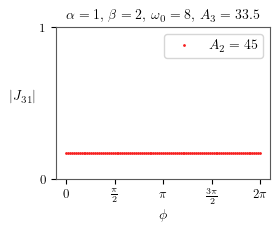

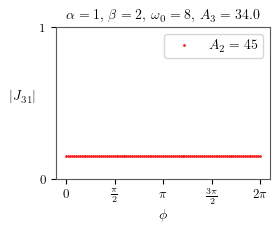

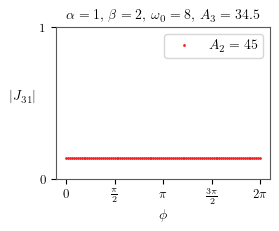

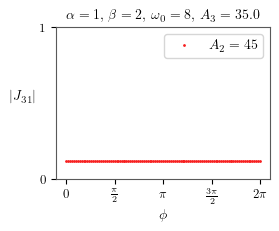

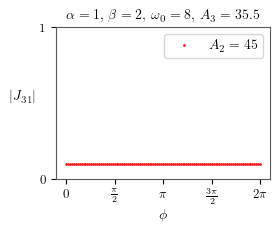

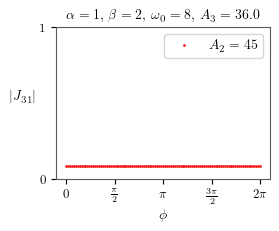

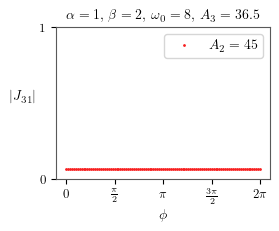

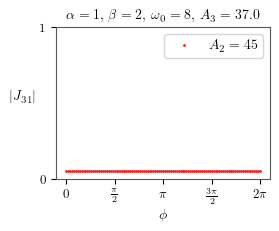

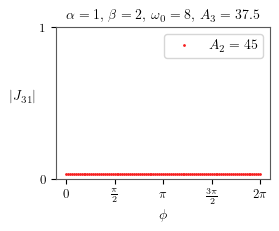

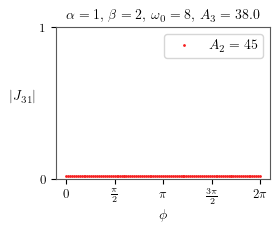

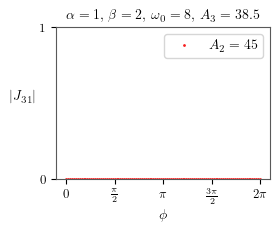

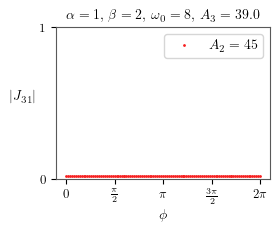

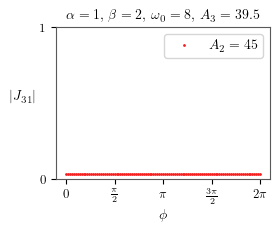

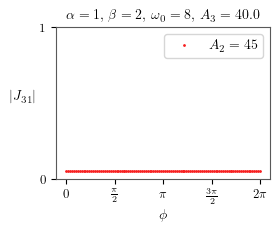

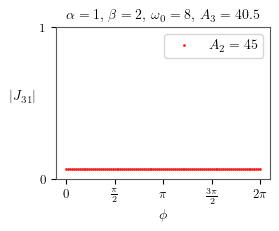

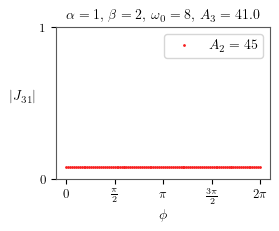

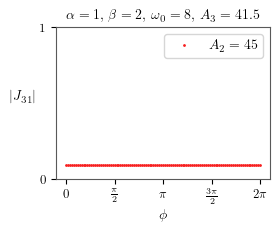

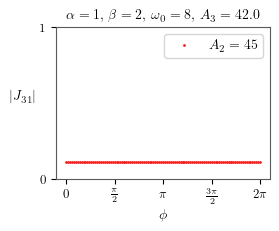

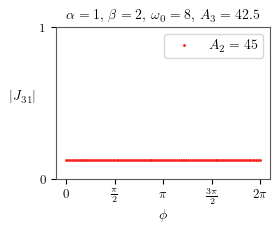

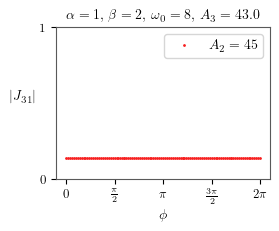

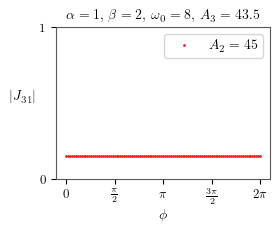

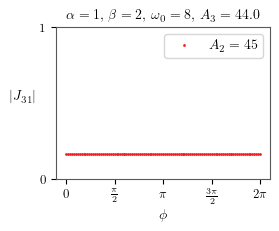

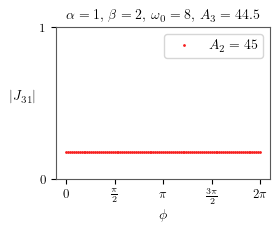

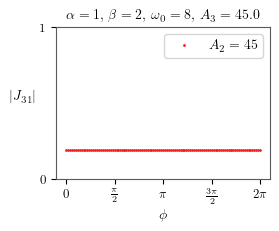

In [69]:
# """
# ABS VAL - keep omega_0 constant (omega0=8)
#     |
#     |
# \xi |
#     |
#     |____________
#           \phi
# - omega_0 constant (omega0=5)
# - compare Ham Evolution and First Term
# - color is A2
# - increase A3 over time
# """

# single A2 value
dfT = df[(df.A2 ==45)
        #  &(df.A3 < jn_zeros(0,1)[0]*16)
        ]

"""
Phases - vary phi
"""
omega0 = 8

phasesFigLoc = Path().absolute().parent.parent/"figures"/"gif_frames"/f"J{J_index}_vs_drive_variables"/"coloured_by_A2"/"A2=45"

cm_unit = 1/2.54

ii = 0
for A3 in np.linspace(0,45,91):
    # if A3 < jn_zeros(0,1)[0]*16: #smaller than like 38
    dfP = dfT[(dfT["omega0"]==omega0)&
                (dfT["A3"]==A3)
                ]
    
    fig, ax = plt.subplots(figsize=(7*cm_unit,5*cm_unit))
    title = r"$\alpha=1$, $\beta=2$, $\omega_0="+str(omega0)+r"$, $A_3="+str(A3)+r"$"

    data = dfP[f"J{J_index}_abs"].to_numpy()
    x = dfP["phi3/pi"].to_numpy()*pi
    colour = dfP.A2.to_numpy()
    # colour = dfP["FT-LowerT.X"]
    sc = ax.plot(x, data, '.',
                     markersize=2,
                       color="#F72020",label=r"$A_2=45$" )

    
    ax.set_xticks([0,pi/2, pi, 3*pi/2, 2*pi])
    ax.set_xticklabels([ '0',r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$",  r"$2\pi$"])
    ax.set_xlabel(r"$\phi$")

    ax.set_ylim([0,1])
    ax.set_yticks([0,1])
        
    ax.set_ylabel(r"$|J_{"+f"{J_index}"+r"}|$", rotation=0, labelpad=12)
    
    ax.legend()
    # cbar.ax.set_yticklabels(['0', r'$\pi/2$', r'$\pi$', r"$3\pi/2$", r"$2\pi$"])
    
    ax.set_title(title)
    plt.savefig(phasesFigLoc/f"Frame{ii}.png", format='png', bbox_inches='tight')
    plt.show()
    ii+=1


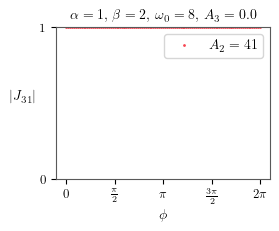

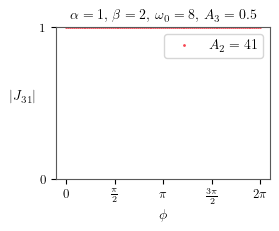

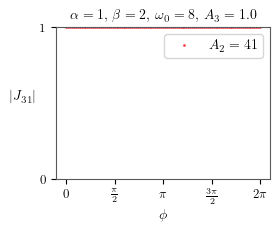

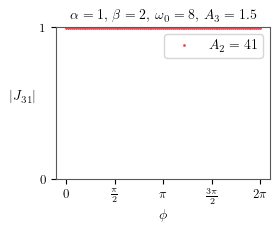

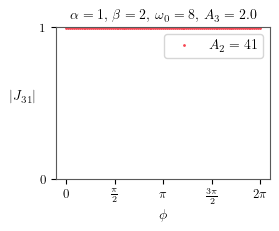

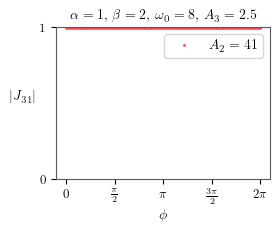

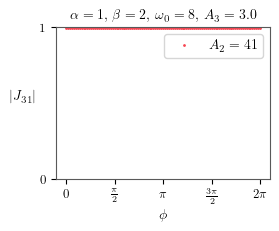

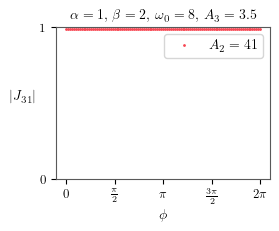

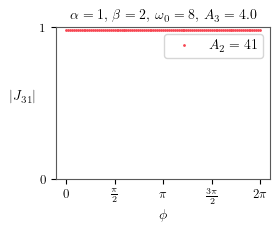

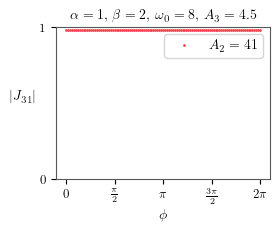

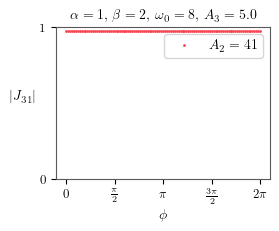

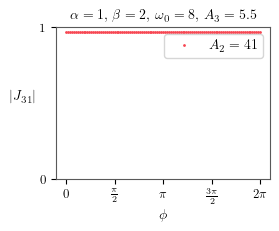

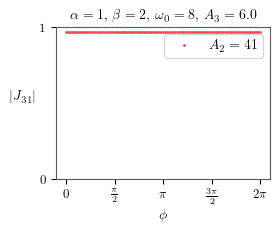

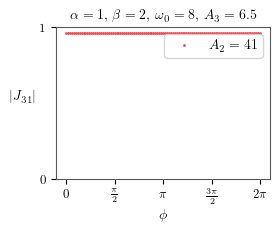

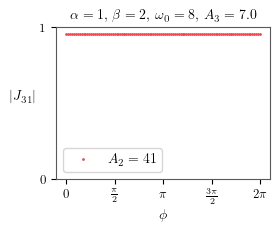

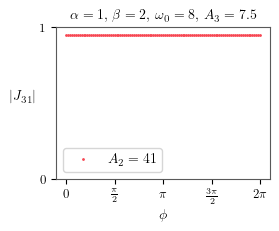

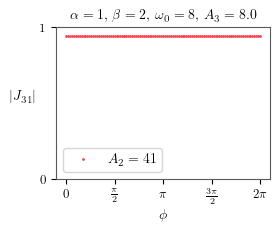

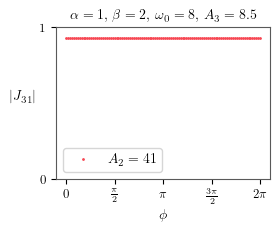

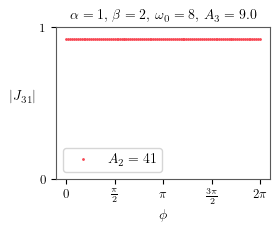

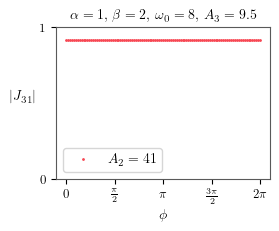

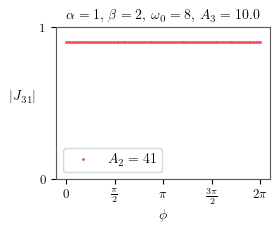

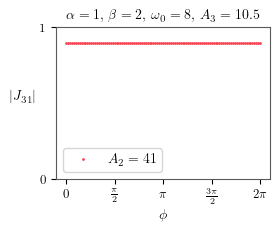

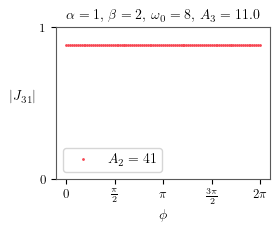

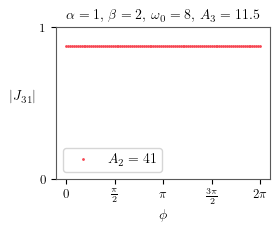

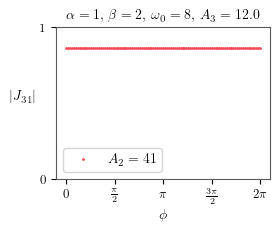

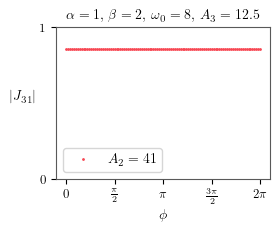

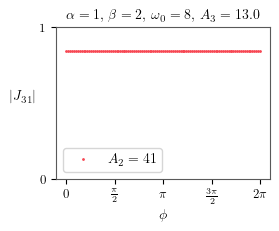

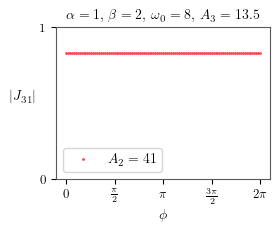

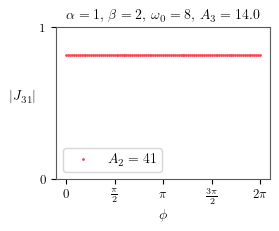

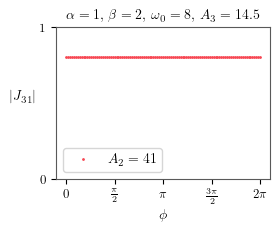

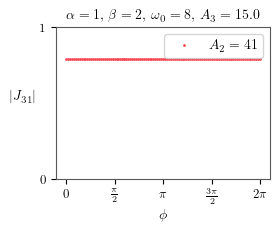

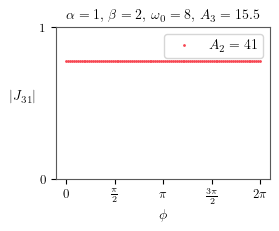

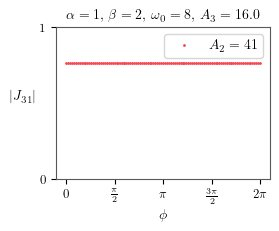

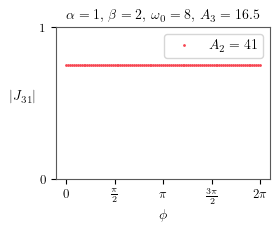

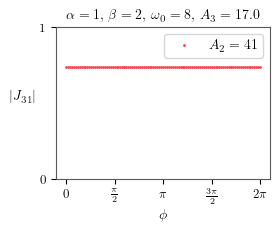

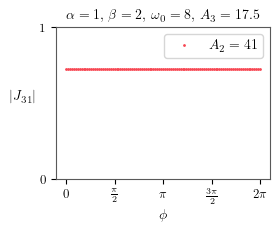

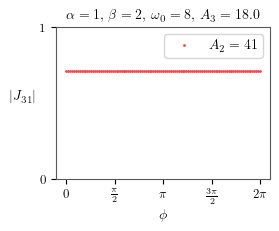

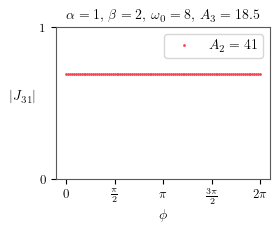

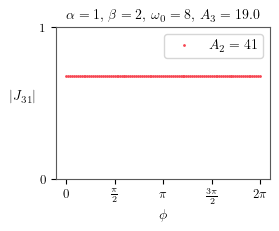

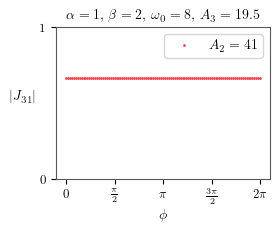

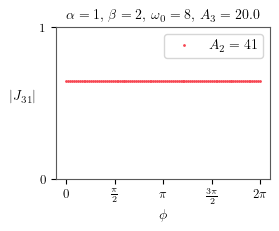

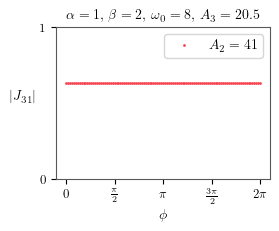

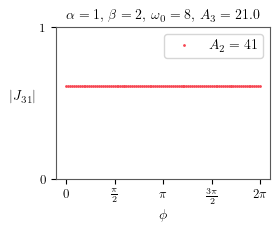

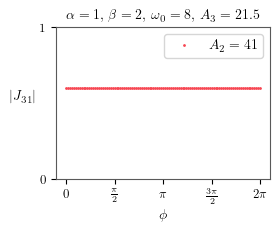

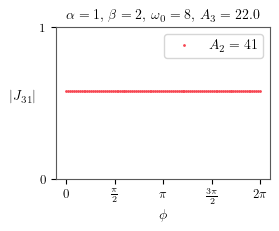

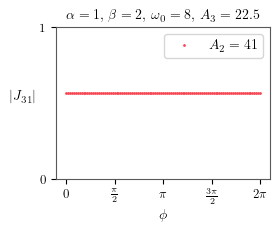

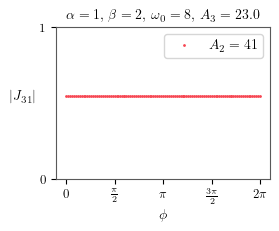

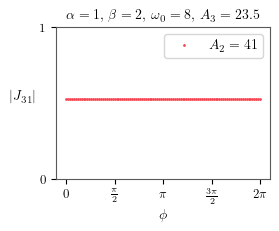

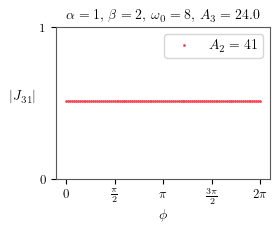

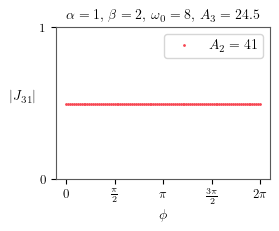

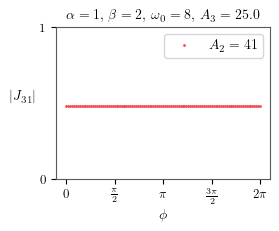

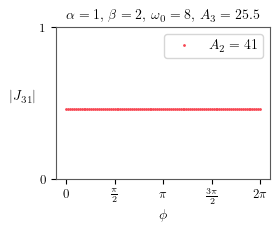

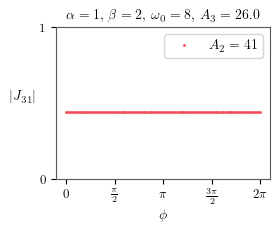

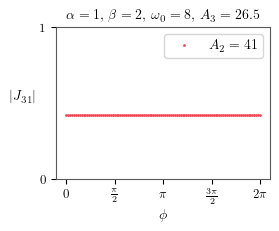

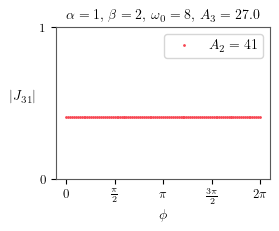

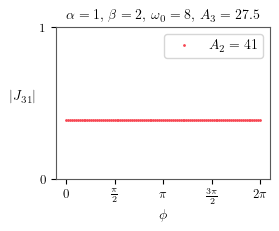

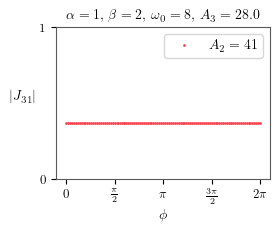

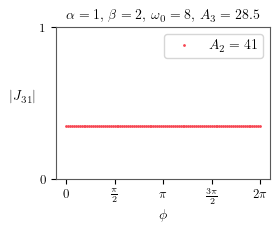

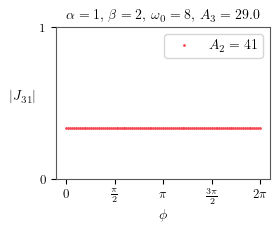

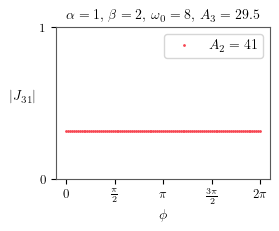

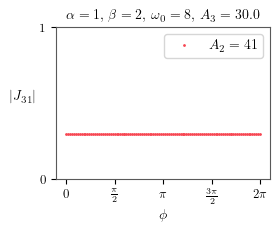

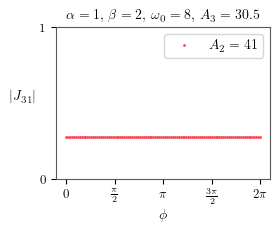

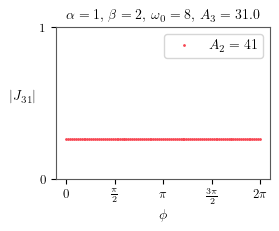

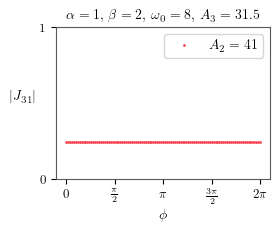

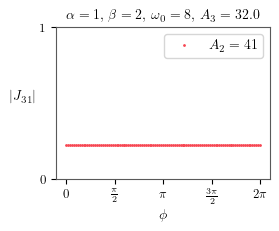

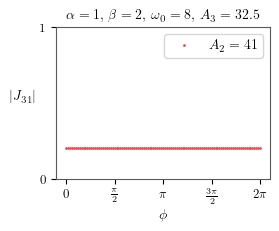

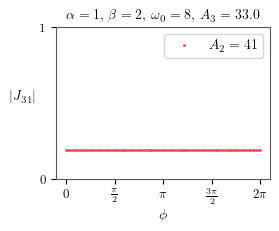

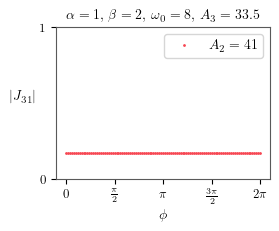

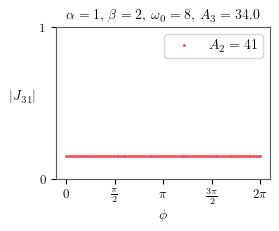

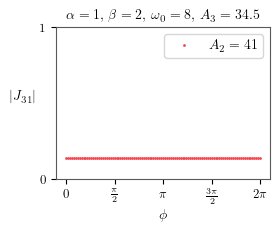

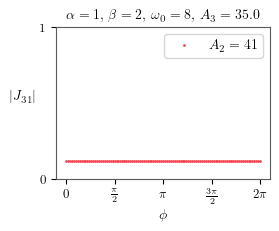

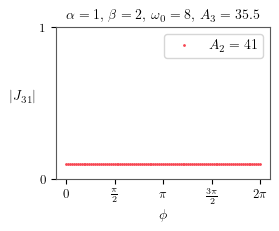

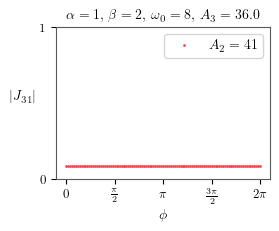

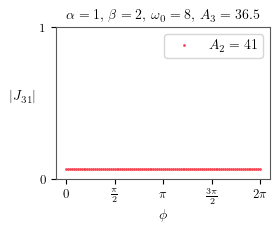

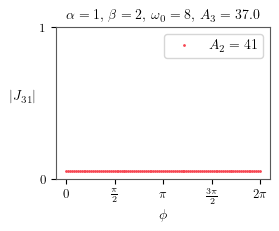

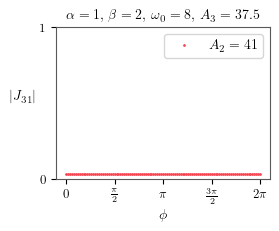

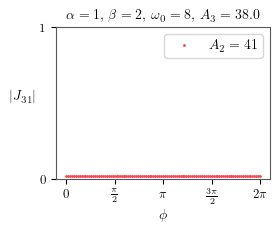

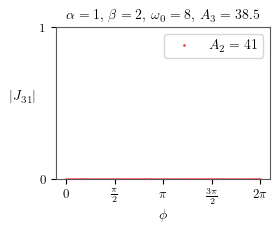

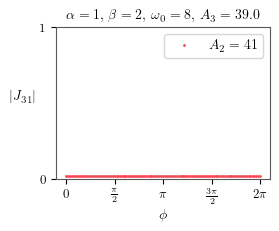

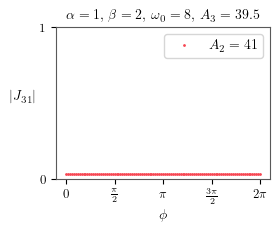

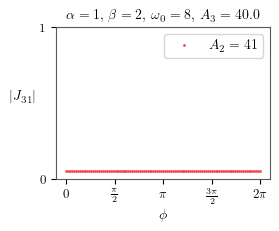

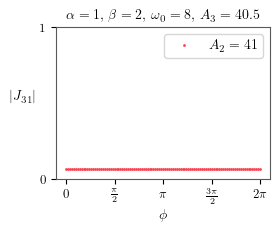

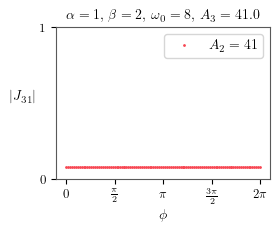

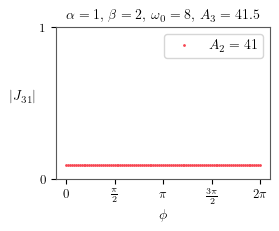

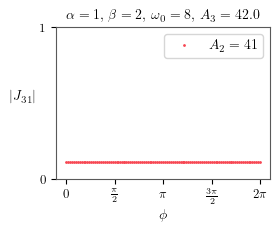

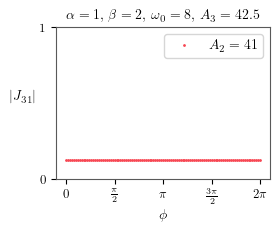

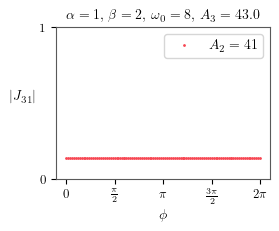

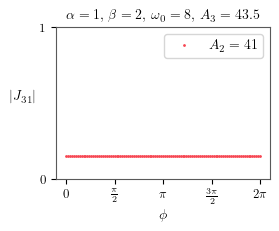

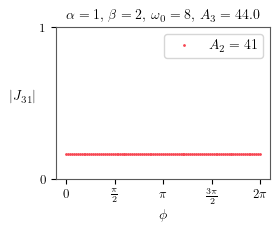

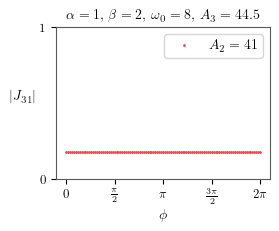

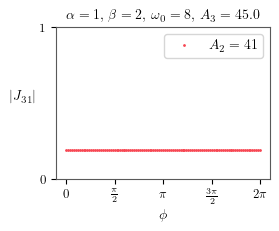

In [70]:
# """
# ABS VAL - keep omega_0 constant (omega0=8)
#     |
#     |
# \xi |
#     |
#     |____________
#           \phi
# - omega_0 constant (omega0=5)
# - compare Ham Evolution and First Term
# - color is A2
# - increase A3 over time
# """
A2 = 41

# single A2 value
dfT = df[(df.A2 ==A2)
        #  &(df.A3 < jn_zeros(0,1)[0]*16)
        ]

"""
Phases - vary phi
"""
omega0 = 8

phasesFigLoc = Path().absolute().parent.parent/"figures"/"gif_frames"/f"J{J_index}_vs_drive_variables"/"coloured_by_A2"/f"A2={A2}"

cm_unit = 1/2.54

ii = 0
for A3 in np.linspace(0,45,91):
    # if A3 < jn_zeros(0,1)[0]*16: #smaller than like 38
    dfP = dfT[(dfT["omega0"]==omega0)&
                (dfT["A3"]==A3)
                ]
    
    fig, ax = plt.subplots(figsize=(7*cm_unit,5*cm_unit))
    title = r"$\alpha=1$, $\beta=2$, $\omega_0="+str(omega0)+r"$, $A_3="+str(A3)+r"$"

    data = dfP[f"J{J_index}_abs"].to_numpy()
    x = dfP["phi3/pi"].to_numpy()*pi
    colour = dfP.A2.to_numpy()
    # colour = dfP["FT-LowerT.X"]
    sc = ax.plot(x, data, '.',
                     markersize=2,
                       color="#F74753", # orange = "#F76120",# dark red = "#F72020"
                       label=rf"$A_2={A2}$" )

    
    ax.set_xticks([0,pi/2, pi, 3*pi/2, 2*pi])
    ax.set_xticklabels([ '0',r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$",  r"$2\pi$"])
    ax.set_xlabel(r"$\phi$")

    ax.set_ylim([0,1])
    ax.set_yticks([0,1])
        
    ax.set_ylabel(r"$|J_{"+f"{J_index}"+r"}|$", rotation=0, labelpad=12)
    
    ax.legend()
    # cbar.ax.set_yticklabels(['0', r'$\pi/2$', r'$\pi$', r"$3\pi/2$", r"$2\pi$"])
    
    ax.set_title(title)
    plt.savefig(phasesFigLoc/f"Frame{ii}.png", format='png', bbox_inches='tight')
    plt.show()
    ii+=1


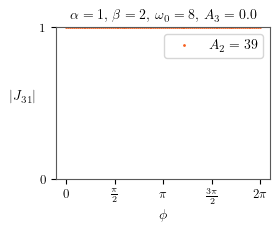

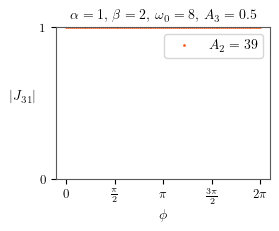

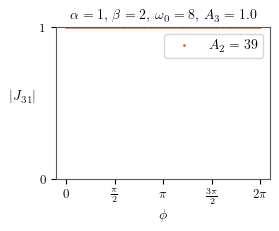

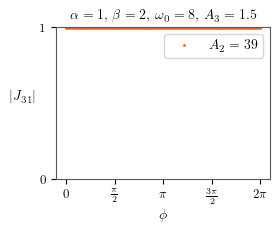

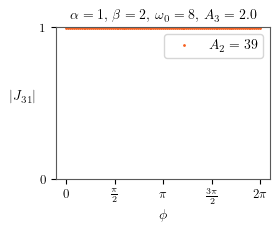

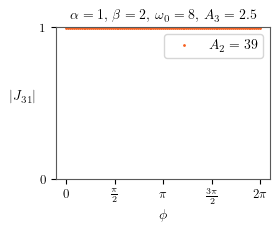

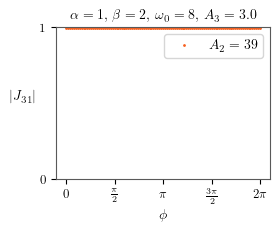

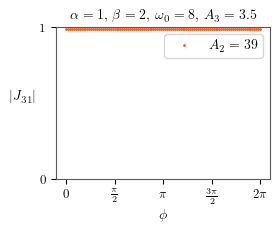

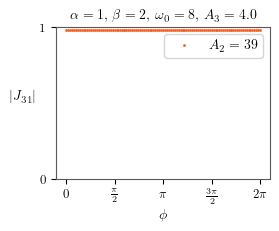

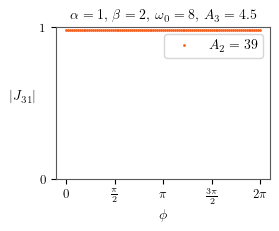

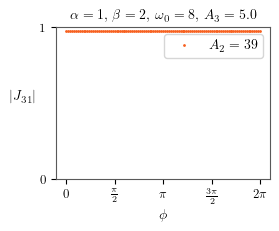

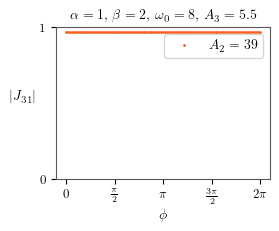

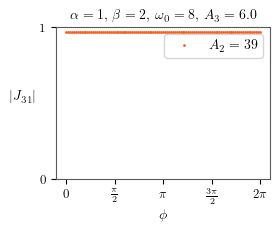

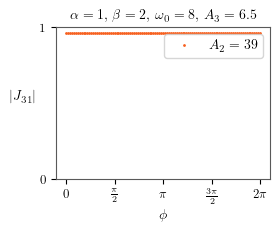

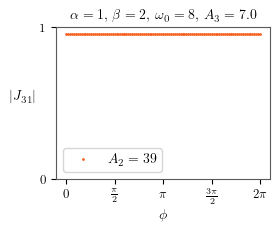

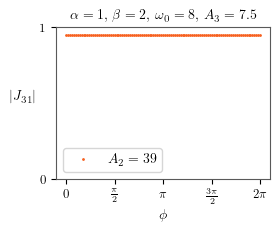

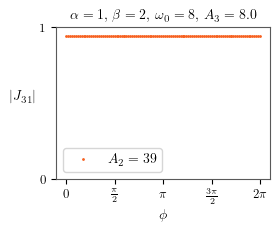

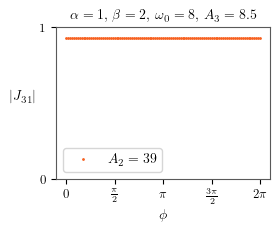

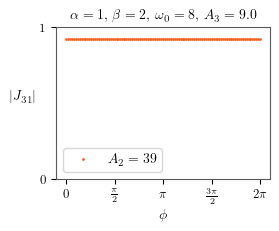

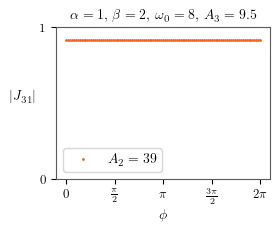

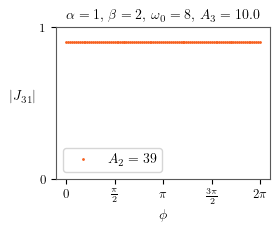

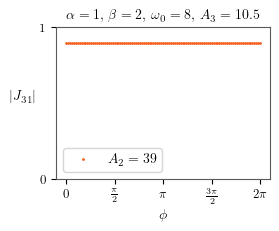

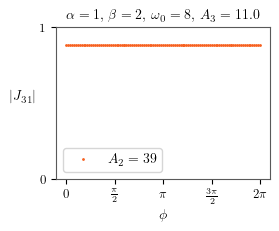

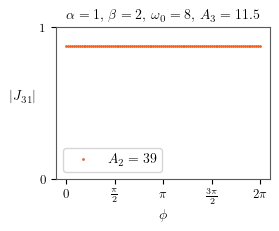

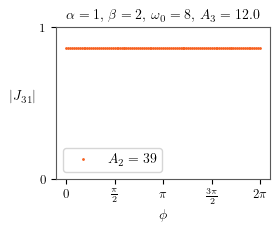

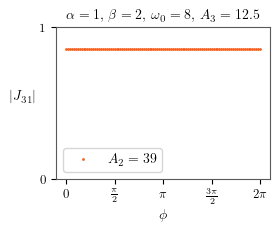

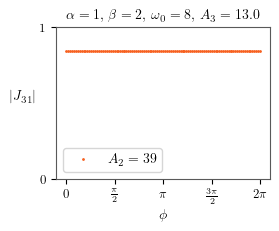

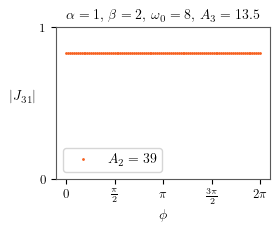

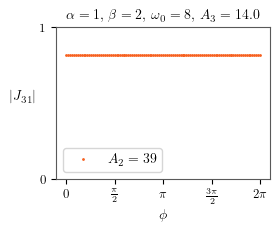

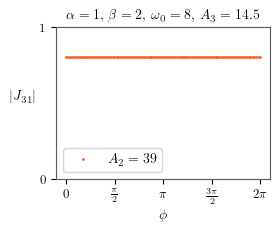

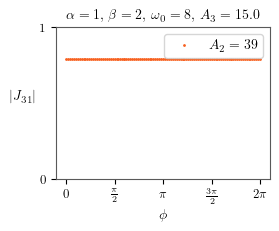

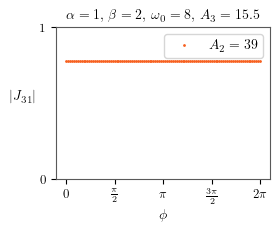

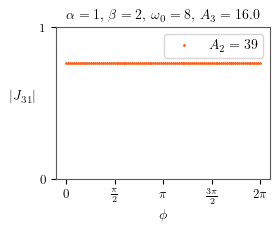

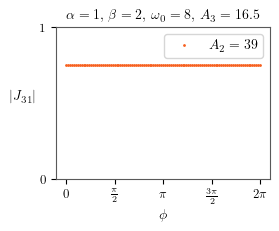

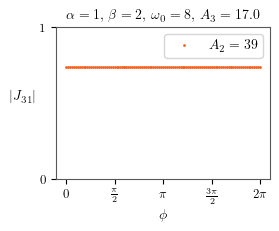

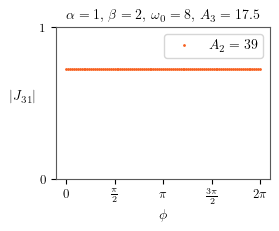

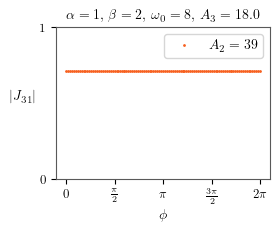

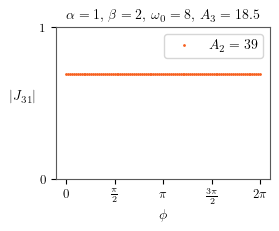

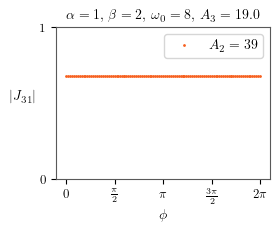

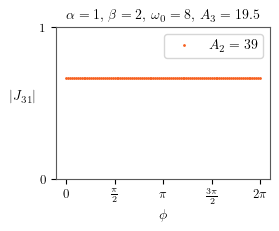

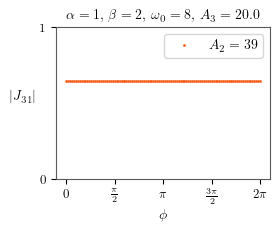

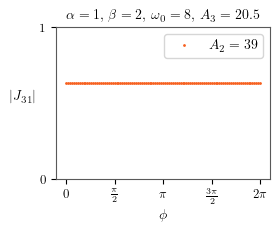

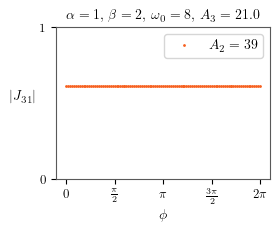

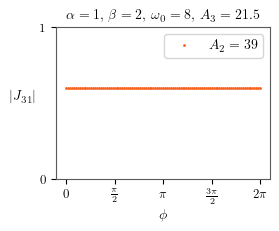

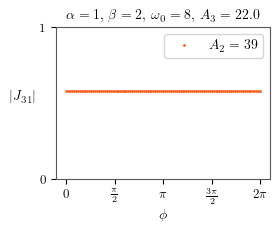

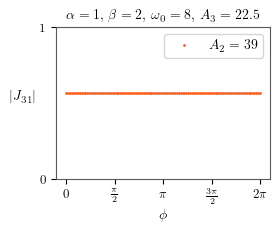

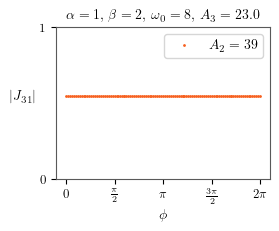

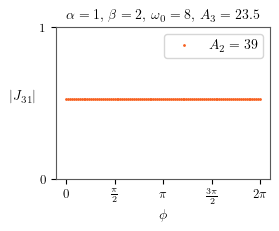

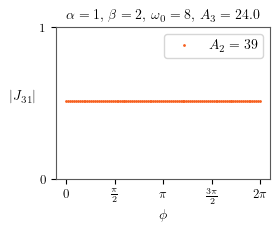

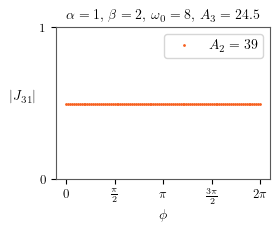

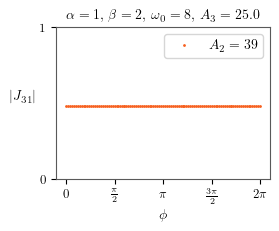

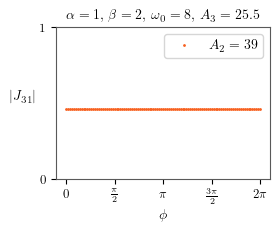

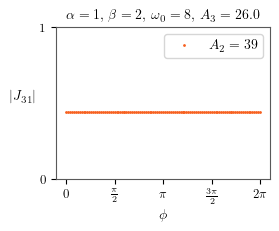

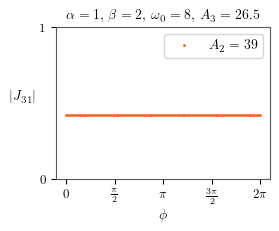

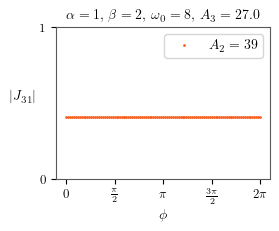

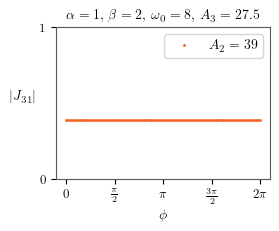

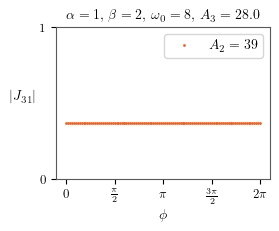

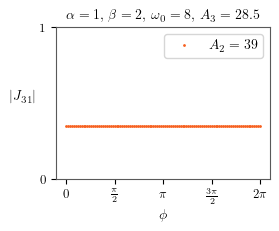

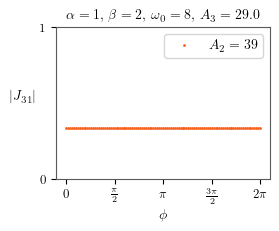

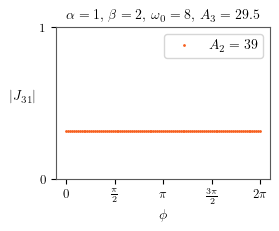

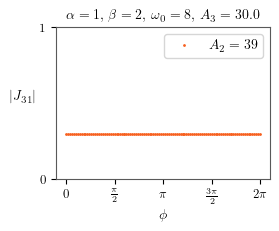

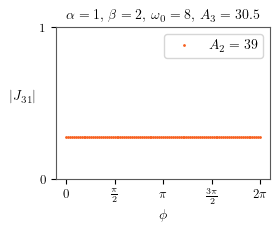

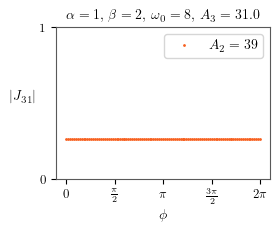

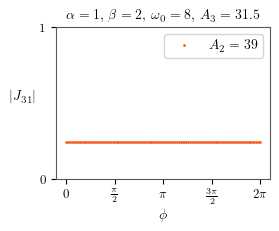

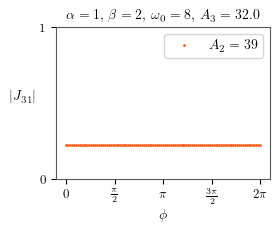

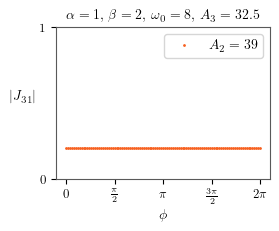

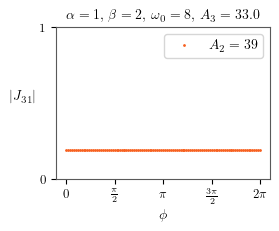

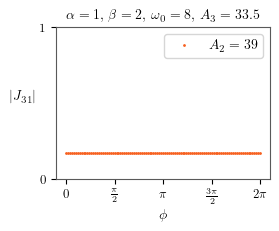

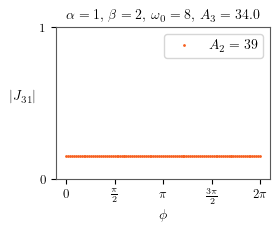

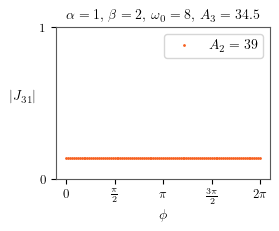

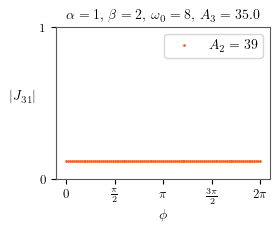

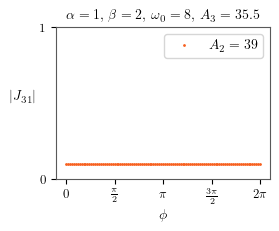

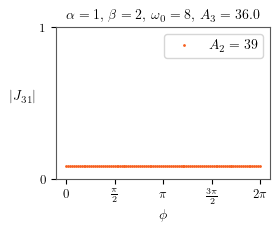

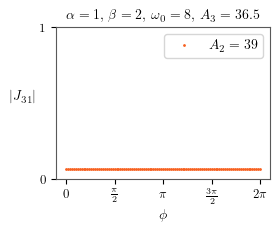

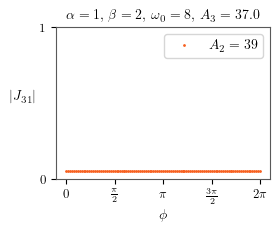

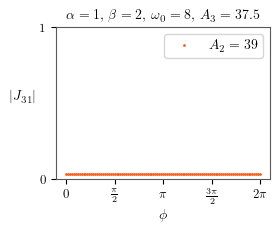

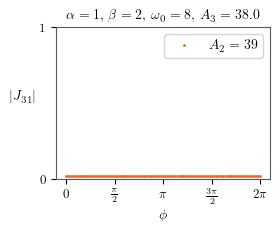

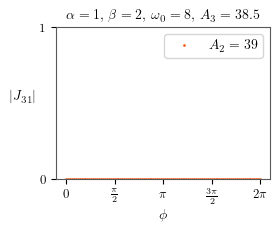

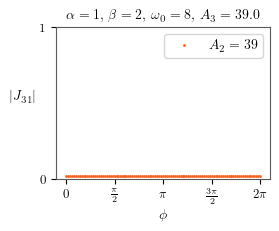

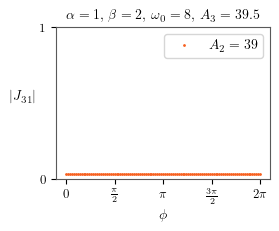

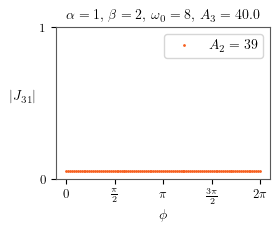

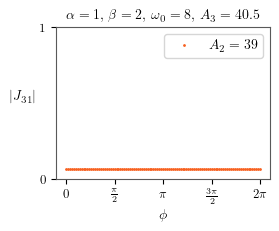

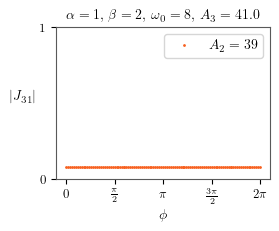

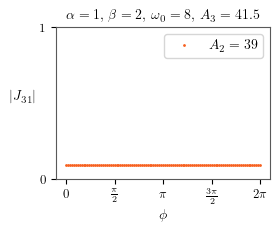

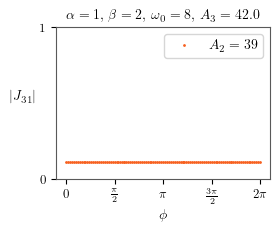

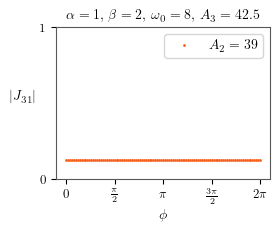

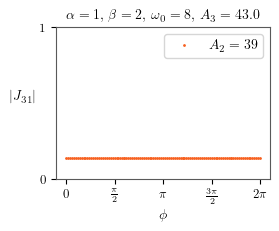

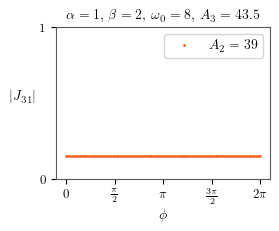

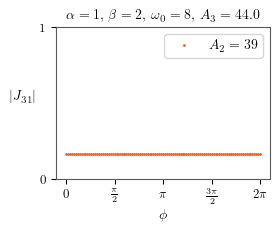

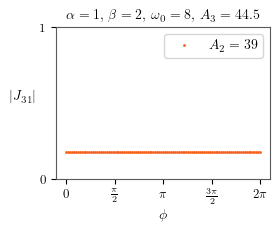

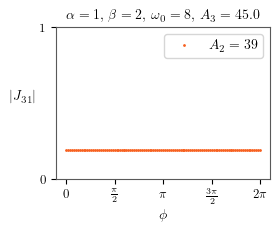

In [71]:
# """
# ABS VAL - keep omega_0 constant (omega0=8)
#     |
#     |
# \xi |
#     |
#     |____________
#           \phi
# - omega_0 constant (omega0=5)
# - compare Ham Evolution and First Term
# - color is A2
# - increase A3 over time
# """
A2 = 39

# single A2 value
dfT = df[(df.A2 ==A2)
        #  &(df.A3 < jn_zeros(0,1)[0]*16)
        ]

"""
Phases - vary phi
"""
omega0 = 8

phasesFigLoc = Path().absolute().parent.parent/"figures"/"gif_frames"/f"J{J_index}_vs_drive_variables"/"coloured_by_A2"/f"A2={A2}"

cm_unit = 1/2.54

ii = 0
for A3 in np.linspace(0,45,91):
    # if A3 < jn_zeros(0,1)[0]*16: #smaller than like 38
    dfP = dfT[(dfT["omega0"]==omega0)&
                (dfT["A3"]==A3)
                ]
    
    fig, ax = plt.subplots(figsize=(7*cm_unit,5*cm_unit))
    title = r"$\alpha=1$, $\beta=2$, $\omega_0="+str(omega0)+r"$, $A_3="+str(A3)+r"$"

    data = dfP[f"J{J_index}_abs"].to_numpy()
    x = dfP["phi3/pi"].to_numpy()*pi
    colour = dfP.A2.to_numpy()
    # colour = dfP["FT-LowerT.X"]
    sc = ax.plot(x, data, '.',
                     markersize=2,
                       color="#F76120",# dark red = "#F72020"
                       label=rf"$A_2={A2}$" )

    
    ax.set_xticks([0,pi/2, pi, 3*pi/2, 2*pi])
    ax.set_xticklabels([ '0',r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$",  r"$2\pi$"])
    ax.set_xlabel(r"$\phi$")

    ax.set_ylim([0,1])
    ax.set_yticks([0,1])
        
    ax.set_ylabel(r"$|J_{"+f"{J_index}"+r"}|$", rotation=0, labelpad=12)
    
    ax.legend()
    # cbar.ax.set_yticklabels(['0', r'$\pi/2$', r'$\pi$', r"$3\pi/2$", r"$2\pi$"])
    
    ax.set_title(title)
    plt.savefig(phasesFigLoc/f"Frame{ii}.png", format='png', bbox_inches='tight')
    plt.show()
    ii+=1
